In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook")
import math
import datetime

In [2]:
table = pd.ExcelFile('/Users/arakh/Downloads/NIRRRR.xlsx')
cols = ['date','stock market name', 'bid', 'ask', 'bid-Ask spread', 'avg price',
        'opening price', 'min price', 'max price', 'last price',
        'avg weight price', 'market price','pension market price', 'admitted quote',
        'closing price', 'ind price', 'ind price type', 'turnover', 'quantity', 'volume',
        'coupon', 'maturity date', 'ind price return', 'bid price return', 'ask price return',
        'last price return', 'closing price return', 'accum coupon income', 'duration',
        'modified duration', 'offer date', 'offer ind price return', 'offer bid price return', 'offer ask price return',
        'offer last price return', 'offer closing price return', 'offer duration', 'modified offer duraton',
        'g-spread', 'g-spread2', 'g-spread benchmark']
security = ['Россия, 46022 (ОФЗ-АД, SU46022RMFS8)',
              'Россия, 26236 (ОФЗ-ПД, SU26236RMFS8)',
              'Россия, 25084 (ОФЗ-ПД, SU25084RMFS3)',
              'Россия, 26232 (ОФЗ-ПД, SU26232RMFS7)',
              'Россия, 46011 (ОФЗ-АД, SU46011RMFS1)',
              'Россия, 29007 (ОФЗ-ПК, SU29007RMFS0)', 
              'Тинькофф Банк, 001P-03R', 
              'Сбербанк России, 002P-01',
              'Московский кредитный банк, 001Р-03',
              'АФК Система, 001P-10',
              'Башнефть, 07',
              'Буровая компания Евразия, БО-001P-03',
              'ВЭБ.РФ, ПБО-001P-17',
              'ВЭБ.РФ, ПБО-001Р-22',
              'ГТЛК, 001P-04',
              'Газпромбанк, БО-17',
              'Группа компаний Самолет, БО-П10', 
              'МТС, 001P-12',
              'Магнит, БО-002Р-01',
              'Металлоинвест, БО-04',
              'ПИК-Корпорация, 001Р-04',
              'РЖД, 001P-20R',
              'РЖД, 001Р-21R',
              'РЖД, 23',
              'Роснефть, 001P-04',
              'Роснефть, 002P-04',
              'Роснефть, 05',
              'Ростелеком, 002P-02R',
              'Сбербанк России, 001P-06R',
              'Сбербанк России, 001P-SBER12',
              'Сбербанк России, 001P-SBER15',
              'Сбербанк России, 001P-SBER16',
              'Сбербанк России, 001Р-SBER17',
              'Сбербанк России, 001Р-SBER18',
              'Сбербанк России, 001Р-SBER32',
              'Сегежа Групп, 001P-01R',
              'ТрансКонтейнер, ПБО-01', 
              'Липецкая область, 34012', 
              'Белгородская область, 34016',
              'ХМАО, 35002',
              'Республика Башкортостан, 34011',
              'Республика Башкортостан, 34012',
              'Ярославская область, 35016',
              'Россия, 26234 (ОФЗ-ПД, SU26234RMFS3)',
              'Россия, 26229 (ОФЗ-ПД, SU26229RMFS3)',
              'Россия, 26228 (ОФЗ-ПД, SU26228RMFS5)',
              'Россия, 26227 (ОФЗ-ПД, SU26227RMFS7)',
              'Россия, 26235 (ОФЗ-ПД, SU26235RMFS0)',
             'Башнефть, 06',
             'РусГидро, 07',
             'РЖД, 30',
             'Москва, 48',
             'Россия, 26207 (ОФЗ-ПД, SU26207RMFS9)',
             'Россия, 26212 (ОФЗ-ПД, SU26212RMFS9)',
             'Россия, 26215 (ОФЗ-ПД, SU26215RMFS2)',
             'Россия, 26211 (ОФЗ-ПД, SU26211RMFS1)',
             'А Девелопмент, 001Р-01',
             'Альфа-Банк, С01-01',
             'Банк ВТБ (ПАО), СУБ-Т1-5',
             'Вертолеты России, БО-03',
             #'Газпром Капитал, 001Б-02',
             'ТД РКС, БО-01',
             'ЭБИС, БО-П03',
             'Агрофирма-племзавод Победа, 001P-01',
             'Левенгук, БО-01',
             'ХК Финанс, 001P-04',
             'Синара-Транспортные Машины, 001Р-01',
             'Селектел, 001Р-01R',
             'Детский мир, БО-06',
             'РУСАЛ Братск, БО-002Р-01',
             'ГК Пионер, 001P-05',
             'РНКБ Банк, 01',
             'ЯТЭК, 001P-02',
             'Легенда, 001Р-02',
             'Коммерческая недвижимость ФПК Гарант-Инвест, 001P-05',
             'Коммерческая недвижимость ФПК Гарант-Инвест, 001P-06',
             'Завод КЭС, 001P-02',
             'ГК Пионер, 001P-04',
             'Легенда, 001Р-03',
             'Ред Софт, 002Р-02',
             'ПР-Лизинг, 002Р-01',
             'Орловская область, 34001',
             'Московская область, 34012',
             'Московская область, 34011',
             'Московская область, 34013',
             'Московская область, 34014',
             'Московская область, 35010',
             'Москва, 72',
             'Московская область, 35015',
             'Республика Карелия, 35018',
             'Оренбургская область, 35003',
             'Свердловская область, 35004',
             'Саратовская область, 35001',
             'Свердловская область, 34011',
             'Свердловская область, 35003',
             'Волгоградская область, 35007',
             'Нижегородская область, 35016',
             'Краснодарский край, 35003',
             'Томская область, 35067',
             'Республика Саха (Якутия), 35012',
             'Хабаровский край, 35007'
             'АБЗ-1, 001Р-01',
             'АФК Система, 001P-07',
             'АФК Система, 001P-09',
             'АФК Система, 001P-11',
             'АФК Система, 001P-21',
             'Альфа-Банк, 002Р-10',
             'Аэрофлот, П01-БО-01',
             'Банк ВТБ (ПАО), Б-1-252',
             'Банк ВТБ (ПАО), Б-1-253'
             'Белуга Групп, БО-П04',
             'Боржоми Финанс, 001Р-01',
             'Брусника. Строительство и девелопмент, 001P-01',
             'Брусника. Строительство и девелопмент, 001Р-02',
             'Брусника. Строительство и девелопмент, 002Р-01',
             'ГТЛК, 001P-03',
             'ГТЛК, 001P-15',
             'Газпром Капитал, БО-05',
             'Газпромбанк, 001P-05P',
             'Газпромбанк, 001P-13P',
             'Газпромбанк, 001Р-17Р',
             'Газпромбанк, БО-19',
             'Группа ЛСР (ПАО), 001P-04',
            'Группа Черкизово, БО-001P-02',
            'Группа компаний Самолет, БО-П08',
             'Группа компаний Самолет, БО-П09',
              'Группа компаний Самолет, БО-П11',
             'Джи-групп, 002Р-01',
             'Домодедово Фьюэл Фасилитис, 001P-01',
             'КИВИ Финанс, 001Р-01',
             'МВ Финанс, 001Р-01',
             'МТС, 001P-13',
             'МТС-Банк, 001P-01',
             'МаксимаТелеком, БО-П01',
             'ОКЕЙ, 001P-03',
             'ПИК-Корпорация, 001P-02',
              'ПИК-Корпорация, 001Р-03',
             'РЕСО-Лизинг, БО-П-06',
             'Русская Аквакультура, 001Р-01',
             'Сбербанк России, 001P-16R',
             'Сбербанк России, 001Р-SBER19',
             'Сбербанк России, 001Р-SBER22',
             'Сбербанк России, 001Р-SBER24',
             'Сегежа Групп, 002P-01R',
             'Сегежа Групп, 002P-03R',
             'СофтЛайн Трейд, 001P-04',
             'Уралкалий, ПБО-06-P',
             'ХК Новотранс, 001P-01',
             'Центральная ППК, П01-БО-03',
             'ЯТЭК, 001Р-01']

df1 = pd.read_excel(table, 'Gov_AD_5.5', names = cols).iloc[8:,:].set_index('date') #Россия, 46022 (ОФЗ-АД, SU46022RMFS8)














FileNotFoundError: [Errno 2] No such file or directory: '/Users/arakh/Downloads/NIRRRR.xlsx'

In [4]:
len(security)

147

In [7]:
df2 = pd.read_excel(table, 'Gov_OFZ_5.7', names = cols).iloc[8:,:].set_index('date') #Россия, 26236 (ОФЗ-ПД, SU26236RMFS8)
df3 = pd.read_excel(table, 'Gov_OFZ_5.3', names = cols).iloc[8:,:].set_index('date') #Россия, 25084 (ОФЗ-ПД, SU25084RMFS3)
df4 = pd.read_excel(table, 'Gov_OFZ_6.0', names = cols).iloc[8:,:].set_index('date') #Россия, 26232 (ОФЗ-ПД, SU26232RMFS7)
df5 = pd.read_excel(table, 'Gov_AD_10.0', names = cols).iloc[8:,:].set_index('date') #Россия, 46011 (ОФЗ-АД, SU46011RMFS1)
df6 = pd.read_excel(table, 'Gov_OFZ-PK_9.17', names = cols).iloc[8:,:].set_index('date') #Россия, 29007 (ОФЗ-ПК, SU29007RMFS0)
df7 = pd.read_excel(table, 'Cor_Tink_8.25', names = cols).iloc[8:,:].set_index('date') #Тинькофф Банк, 001P-03R
df8 = pd.read_excel(table, 'Cor_Sber_8.80', names = cols).iloc[8:,:].set_index('date') #Сбербанк России, 002P-01
df9 = pd.read_excel(table, 'Cor_MKB_8.35', names = cols).iloc[8:,:].set_index('date') #Московский кредитный банк, 001Р-03
#IFX index
df10 = pd.read_excel(table, 'Cor_AFK_9.90', names = cols).iloc[8:,:].set_index('date') 
df11 = pd.read_excel(table, 'Cor_Bash_5.50', names = cols).iloc[8:,:].set_index('date')
df12 = pd.read_excel(table, 'Cor_Evr_8.40', names = cols).iloc[8:,:].set_index('date')
df13 = pd.read_excel(table, 'Cor_VEB_8.15', names = cols).iloc[8:,:].set_index('date')
df14 = pd.read_excel(table, 'Cor_VEB_5.95', names = cols).iloc[8:,:].set_index('date')
df15 = pd.read_excel(table, 'Cor_GTLK_9.85', names = cols).iloc[8:,:].set_index('date')
df16 = pd.read_excel(table, 'Cor_Gaz_8.15', names = cols).iloc[8:,:].set_index('date')
df17 = pd.read_excel(table, 'Cor_Sam_9.15', names = cols).iloc[8:,:].set_index('date')
df18 = pd.read_excel(table, 'Cor_MTS_6.85', names = cols).iloc[8:,:].set_index('date')
df19 = pd.read_excel(table, 'Cor_Magnit_6.20', names = cols).iloc[8:,:].set_index('date')
df20 = pd.read_excel(table, 'Cor_Met_6.55', names = cols).iloc[8:,:].set_index('date')
df21 = pd.read_excel(table, 'Cor_Pik_8.20', names = cols).iloc[8:,:].set_index('date')
df22 = pd.read_excel(table, 'Cor_RZD_7.35', names = cols).iloc[8:,:].set_index('date')
df23 = pd.read_excel(table, 'Cor_RZD_6.85', names = cols).iloc[8:,:].set_index('date')
df24 = pd.read_excel(table, 'Cor_RZD_7.85', names = cols).iloc[8:,:].set_index('date')
df25 = pd.read_excel(table, 'Cor_Neft_8.65', names = cols).iloc[8:,:].set_index('date')
df26 = pd.read_excel(table, 'Cor_Neft_7.50', names = cols).iloc[8:,:].set_index('date')
df27 = pd.read_excel(table, 'Cor_Neft_7.90', names = cols).iloc[8:,:].set_index('date')
df28 = pd.read_excel(table, 'Cor_Rost_6.65', names = cols).iloc[8:,:].set_index('date')
df29 = pd.read_excel(table, 'Cor_Sber_7.20', names = cols).iloc[8:,:].set_index('date')
df30 = pd.read_excel(table, 'Cor_Sber_7.70', names = cols).iloc[8:,:].set_index('date')
df31 = pd.read_excel(table, 'Cor_Sber_6.30', names = cols).iloc[8:,:].set_index('date')
df32 = pd.read_excel(table, 'Cor_Sber_5.65', names = cols).iloc[8:,:].set_index('date')
df33 = pd.read_excel(table, 'Cor_Sber_5.70', names = cols).iloc[8:,:].set_index('date')
df34 = pd.read_excel(table, 'Cor_Sber_5.25', names = cols).iloc[8:,:].set_index('date')
df35 = pd.read_excel(table, 'Cor_Sber_7.30', names = cols).iloc[8:,:].set_index('date')
df36 = pd.read_excel(table, 'Cor_Seg_7.10', names = cols).iloc[8:,:].set_index('date')
df37 = pd.read_excel(table, 'Cor_Trans_7.30', names = cols).iloc[8:,:].set_index('date')

df38 = pd.read_excel(table, 'Mun_Lip_5.75', names = cols).iloc[8:,:].set_index('date')
df39 = pd.read_excel(table, 'Mun_Bel_5.70', names = cols).iloc[8:,:].set_index('date')
df40 = pd.read_excel(table, 'Mun_XMAO_7.60', names = cols).iloc[8:,:].set_index('date')
df41 = pd.read_excel(table, 'Mun_Bash_5.90', names = cols).iloc[8:,:].set_index('date')
df42 = pd.read_excel(table, 'Mun_Bash_7.65', names = cols).iloc[8:,:].set_index('date')
df43 = pd.read_excel(table, 'Mun_Jar_7.95', names = cols).iloc[8:,:].set_index('date')
df44 = pd.read_excel(table, 'Gov_OFZ_4.50', names = cols).iloc[8:,:].set_index('date')
df45 = pd.read_excel(table, 'Gov_OFZ_7.15', names = cols).iloc[8:,:].set_index('date')
df46 = pd.read_excel(table, 'Gov_OFZ_7.65', names = cols).iloc[8:,:].set_index('date')
df47 = pd.read_excel(table, 'Gov_OFZ_7.40', names = cols).iloc[8:,:].set_index('date')
df48 = pd.read_excel(table, 'Gov_OFZ_5.90', names = cols).iloc[8:,:].set_index('date')

df49 = pd.read_excel(table, 'Cor_Bash_7.70', names = cols).iloc[8:,:].set_index('date')
df50 = pd.read_excel(table, 'Cor_Gid_0.10', names = cols).iloc[8:,:].set_index('date')
df51 = pd.read_excel(table, 'Cor_RZD_6.75', names = cols).iloc[8:,:].set_index('date')
df52 = pd.read_excel(table, 'Mun_Msk_6.00', names = cols).iloc[8:,:].set_index('date')
df53 = pd.read_excel(table, 'Gov_OFZ_8.15', names = cols).iloc[8:,:].set_index('date')
df54 = pd.read_excel(table, 'Gov_OFZ_7.05', names = cols).iloc[8:,:].set_index('date')
df55 = pd.read_excel(table, 'Gov_OFZ_7.00', names = cols).iloc[8:,:].set_index('date')
df56 = pd.read_excel(table, 'Gov_OF_7.00', names = cols).iloc[8:,:].set_index('date')
df57 = pd.read_excel(table, 'Cor_Dev_13.85', names = cols).iloc[8:,:].set_index('date')
df58 = pd.read_excel(table, 'Cor_Alpha_11.75', names = cols).iloc[8:,:].set_index('date')
df59 = pd.read_excel(table, 'Cor_VTB_10.00', names = cols).iloc[8:,:].set_index('date')
df60 = pd.read_excel(table, 'Cor_Vert_8.80', names = cols).iloc[8:,:].set_index('date')
df61 = pd.read_excel(table, 'Cor_Gazcap_8.45', names = cols).iloc[8:,:].set_index('date')
df62 = pd.read_excel(table, 'Cor_TD_14.00', names = cols).iloc[8:,:].set_index('date')
df63 = pd.read_excel(table, 'Cor_EBIS_13.00', names = cols).iloc[8:,:].set_index('date')
df64 = pd.read_excel(table, 'Cor_Pob_9.75', names = cols).iloc[8:,:].set_index('date')
df65 = pd.read_excel(table, 'Cor_Leven_13.00', names = cols).iloc[8:,:].set_index('date')
df66 = pd.read_excel(table, 'Cor_Fin_7.50', names = cols).iloc[8:,:].set_index('date')
df67 = pd.read_excel(table, 'Cor_Sin_8.10', names = cols).iloc[8:,:].set_index('date')
df68 = pd.read_excel(table, 'Cor_Sel_8.50', names = cols).iloc[8:,:].set_index('date')
df69 = pd.read_excel(table, 'Cor_Det_7.00', names = cols).iloc[8:,:].set_index('date')
df70 = pd.read_excel(table, 'Cor_RUSAL_6.50', names = cols).iloc[8:,:].set_index('date')
df71 = pd.read_excel(table, 'Cor_pioner_9.75', names = cols).iloc[8:,:].set_index('date')
df72 = pd.read_excel(table, 'Cor_RNKB_6.80', names = cols).iloc[8:,:].set_index('date')
df73 = pd.read_excel(table, 'Cor_YATEK_9.15', names = cols).iloc[8:,:].set_index('date')
df74 = pd.read_excel(table, 'Cor_Leg_11.00', names = cols).iloc[8:,:].set_index('date')
df75 = pd.read_excel(table, 'Cor_Gar_12.00', names = cols).iloc[8:,:].set_index('date')
df76 = pd.read_excel(table, 'Cor_Gar_11.50', names = cols).iloc[8:,:].set_index('date')
df77 = pd.read_excel(table, 'Cor_Zavod_14.00', names = cols).iloc[8:,:].set_index('date')
df78 = pd.read_excel(table, 'Cor_pioner_10.50', names = cols).iloc[8:,:].set_index('date')
df79 = pd.read_excel(table, 'Cor_Leg_13.50', names = cols).iloc[8:,:].set_index('date')
df80 = pd.read_excel(table, 'Cor_Red_11.00', names = cols).iloc[8:,:].set_index('date')
df81 = pd.read_excel(table, 'Cor_PR_10.00', names = cols).iloc[8:,:].set_index('date')

df82 = pd.read_excel(table, 'Mun_Orel_8.30', names = cols).iloc[8:,:].set_index('date')
df83 = pd.read_excel(table, 'Mun_MO_7.05', names = cols).iloc[8:,:].set_index('date')
df84 = pd.read_excel(table, 'Mun_MO_7.50', names = cols).iloc[8:,:].set_index('date')
df85 = pd.read_excel(table, 'Mun_MO_6.55', names = cols).iloc[8:,:].set_index('date')
df86 = pd.read_excel(table, 'Mun_MO_5.75', names = cols).iloc[8:,:].set_index('date')
df87 = pd.read_excel(table, 'Mun_MO_9.65', names = cols).iloc[8:,:].set_index('date')
df88 = pd.read_excel(table, 'Mun_MSK_6.55', names = cols).iloc[8:,:].set_index('date')
df89 = pd.read_excel(table, 'Mun_MO_5.95', names = cols).iloc[8:,:].set_index('date')
df90 = pd.read_excel(table, 'Mun_Kar_8.00', names = cols).iloc[8:,:].set_index('date')
df91 = pd.read_excel(table, 'Mun_Oren_14.00', names = cols).iloc[8:,:].set_index('date')
df92 = pd.read_excel(table, 'Mun_Sv_5.80', names = cols).iloc[8:,:].set_index('date')
df93 = pd.read_excel(table, 'Mun_Sar_8.10', names = cols).iloc[8:,:].set_index('date')

df94 = pd.read_excel(table, 'Mun_Sv_5.70', names = cols).iloc[8:,:].set_index('date')
df95 = pd.read_excel(table, 'Mun_Sv_9.80', names = cols).iloc[8:,:].set_index('date')
df96 = pd.read_excel(table, 'Mun_Vol_8.40', names = cols).iloc[8:,:].set_index('date')
df97 = pd.read_excel(table, 'Mun_Nig_9.25', names = cols).iloc[8:,:].set_index('date')
df98 = pd.read_excel(table, 'Mun_Kras_6.95', names = cols).iloc[8:,:].set_index('date')
df99 = pd.read_excel(table, 'Mun_Tom_6.70', names = cols).iloc[8:,:].set_index('date')
df100 = pd.read_excel(table, 'Mun_Jak_8.59', names = cols).iloc[8:,:].set_index('date')
df101 = pd.read_excel(table, 'Mun_Hab_9.00', names = cols).iloc[8:,:].set_index('date')

#index CBI
df102 = pd.read_excel(table, 'Cor_ABZ_12.00', names = cols).iloc[8:,:].set_index('date')
df103 = pd.read_excel(table, 'Cor_AFK_6.90', names = cols).iloc[8:,:].set_index('date')
df104 = pd.read_excel(table, 'Cor_AFK_11.30', names = cols).iloc[8:,:].set_index('date')
df105 = pd.read_excel(table, 'Cor_AFK_9.40', names = cols).iloc[8:,:].set_index('date')
df106 = pd.read_excel(table, 'Cor_AFK_8.40', names = cols).iloc[8:,:].set_index('date')
df107 = pd.read_excel(table, 'Cor_Alpha_6.20', names = cols).iloc[8:,:].set_index('date')
df108 = pd.read_excel(table, 'Cor_Aero_8.35', names = cols).iloc[8:,:].set_index('date')
df109 = pd.read_excel(table, 'Cor_VTB_8.60', names = cols).iloc[8:,:].set_index('date')
df110 = pd.read_excel(table, 'Cor_VTB2_8.60', names = cols).iloc[8:,:].set_index('date')
df111 = pd.read_excel(table, 'Cor_Bel_7.40', names = cols).iloc[8:,:].set_index('date')
df112 = pd.read_excel(table, 'Cor_Borz_7.60', names = cols).iloc[8:,:].set_index('date')
df113 = pd.read_excel(table, 'Cor_Brus_11.00', names = cols).iloc[8:,:].set_index('date')
df114 = pd.read_excel(table, 'Cor_Brus_9.60', names = cols).iloc[8:,:].set_index('date')
df115 = pd.read_excel(table, 'Cor_Brus_11.85', names = cols).iloc[8:,:].set_index('date')
df116 = pd.read_excel(table, 'Cor_GTLK_11.00', names = cols).iloc[8:,:].set_index('date')
df117 = pd.read_excel(table, 'Cor_GTLK_7.69', names = cols).iloc[8:,:].set_index('date')
df118 = pd.read_excel(table, 'Cor_Gazcap_8.90', names = cols).iloc[8:,:].set_index('date')
df119 = pd.read_excel(table, 'Cor_Gaz_9.15', names = cols).iloc[8:,:].set_index('date')
df120 = pd.read_excel(table, 'Cor_Gaz_7.40', names = cols).iloc[8:,:].set_index('date')
df121 = pd.read_excel(table, 'Cor_Gaz_5.85', names = cols).iloc[8:,:].set_index('date')
df122 = pd.read_excel(table, 'Cor_Gaz_10.45', names = cols).iloc[8:,:].set_index('date')
df123 = pd.read_excel(table, 'Cor_LSR_8.50', names = cols).iloc[8:,:].set_index('date')
df124 = pd.read_excel(table, 'Cor_Cher_7.50', names = cols).iloc[8:,:].set_index('date')
df125 = pd.read_excel(table, 'Cor_Sam_11.00', names = cols).iloc[8:,:].set_index('date')
df126 = pd.read_excel(table, 'Cor_Sam_9.05', names = cols).iloc[8:,:].set_index('date')
df127 = pd.read_excel(table, 'Cor_Sam_12.70', names = cols).iloc[8:,:].set_index('date')
df128 = pd.read_excel(table, 'Cor_G_10.60', names = cols).iloc[8:,:].set_index('date')
df129 = pd.read_excel(table, 'Cor_Domod_8.10', names = cols).iloc[8:,:].set_index('date')
df130 = pd.read_excel(table, 'Cor_Kiwi_8.40', names = cols).iloc[8:,:].set_index('date')
df131 = pd.read_excel(table, 'Cor_MV_7.30', names = cols).iloc[8:,:].set_index('date')
df132 = pd.read_excel(table, 'Cor_MTS_6.45', names = cols).iloc[8:,:].set_index('date')
df133 = pd.read_excel(table, 'Cor_MTSB_7.45', names = cols).iloc[8:,:].set_index('date')
df134 = pd.read_excel(table, 'Cor_Maks_10.75', names = cols).iloc[8:,:].set_index('date')
df135 = pd.read_excel(table, 'Cor_Okay_7.85', names = cols).iloc[8:,:].set_index('date')
df136 = pd.read_excel(table, 'Cor_PIK_8.25', names = cols).iloc[8:,:].set_index('date')
df137 = pd.read_excel(table, 'Cor_PIK_7.40', names = cols).iloc[8:,:].set_index('date')
df138 = pd.read_excel(table, 'Cor_RESO_9.00', names = cols).iloc[8:,:].set_index('date')
df139 = pd.read_excel(table, 'Cor_Akva_9.50', names = cols).iloc[8:,:].set_index('date')
df140 = pd.read_excel(table, 'Cor_Sber_7.50', names = cols).iloc[8:,:].set_index('date')
df141 = pd.read_excel(table, 'Cor_Sber_5.55', names = cols).iloc[8:,:].set_index('date')
df142 = pd.read_excel(table, 'Cor_Sber_6.90', names = cols).iloc[8:,:].set_index('date')
df143 = pd.read_excel(table, 'Cor_Sber_6.65', names = cols).iloc[8:,:].set_index('date')
df144 = pd.read_excel(table, 'Cor_Seg_9.85', names = cols).iloc[8:,:].set_index('date')
df145 = pd.read_excel(table, 'Cor_Seg_10.90', names = cols).iloc[8:,:].set_index('date')
df146 = pd.read_excel(table, 'Cor_Soft_8.90', names = cols).iloc[8:,:].set_index('date')
df147 = pd.read_excel(table, 'Cor_Ural_6.85', names = cols).iloc[8:,:].set_index('date')
df148 = pd.read_excel(table, 'Cor_Novo_8.75', names = cols).iloc[8:,:].set_index('date')
df149 = pd.read_excel(table, 'Cor_Centr_9.50', names = cols).iloc[8:,:].set_index('date')
df150 = pd.read_excel(table, 'Cor_Yatek_8.50', names = cols).iloc[8:,:].set_index('date')

df151 = pd.read_excel(table, 'Gov_OFZ_8.50', names = cols).iloc[8:,:].set_index('date')
df152 = pd.read_excel(table, 'Cor_Alr_5.75', names = cols).iloc[8:,:].set_index('date')
df153 = pd.read_excel(table, 'Cor_Alr2_5.75', names = cols).iloc[8:,:].set_index('date')
df154 = pd.read_excel(table, 'Cor_Alr3_5.75', names = cols).iloc[8:,:].set_index('date')
df155 = pd.read_excel(table, 'Cor_Alr4_5.75', names = cols).iloc[8:,:].set_index('date')
df156 = pd.read_excel(table, 'Cor_Alr5_5.75', names = cols).iloc[8:,:].set_index('date')
df157 = pd.read_excel(table, 'Cor_Avt_7.95', names = cols).iloc[8:,:].set_index('date')
df158 = pd.read_excel(table, 'Cor_Avt_6.75', names = cols).iloc[8:,:].set_index('date')
df159 = pd.read_excel(table, 'Cor_Alpha_5.90', names = cols).iloc[8:,:].set_index('date')
df160 = pd.read_excel(table, 'Cor_Alpha_5.95', names = cols).iloc[8:,:].set_index('date')
df161 = pd.read_excel(table, 'Cor_Alpha_7.00', names = cols).iloc[8:,:].set_index('date')
df162 = pd.read_excel(table, 'Cor_Alpha_7.15', names = cols).iloc[8:,:].set_index('date')
df163 = pd.read_excel(table, 'Cor_Alpha_7.90', names = cols).iloc[8:,:].set_index('date')
df164 = pd.read_excel(table, 'Cor_Alpha_9.55', names = cols).iloc[8:,:].set_index('date')
#df165 = pd.read_excel(table, 'Cor_Alpha_6.85', names = cols).iloc[8:,:].set_index('date')
#df166 = pd.read_excel(table, 'Cor_Alpha2_6.85', names = cols).iloc[8:,:].set_index('date')
df167 = pd.read_excel(table, 'Cor_Alpha2_5.90', names = cols).iloc[8:,:].set_index('date')
df168 = pd.read_excel(table, 'Cor_Alpha_5.70', names = cols).iloc[8:,:].set_index('date')
df169 = pd.read_excel(table, 'Cor_Alpha_7.75', names = cols).iloc[8:,:].set_index('date')
df170 = pd.read_excel(table, 'Cor_Alpha_6.15', names = cols).iloc[8:,:].set_index('date')
df171 = pd.read_excel(table, 'Cor_Atom_7.50', names = cols).iloc[8:,:].set_index('date')
df172 = pd.read_excel(table, 'Cor_VTB_7.50', names = cols).iloc[8:,:].set_index('date')
df173 = pd.read_excel(table, 'Cor_VTB_7.60', names = cols).iloc[8:,:].set_index('date')
df174 = pd.read_excel(table, 'Cor_VEBL_7.91', names = cols).iloc[8:,:].set_index('date')
df175 = pd.read_excel(table, 'Cor_VEB_7.67', names = cols).iloc[8:,:].set_index('date')
df176 = pd.read_excel(table, 'Cor_VEB_7.48', names = cols).iloc[8:,:].set_index('date')
df177 = pd.read_excel(table, 'Cor_VEB_7.27', names = cols).iloc[8:,:].set_index('date')
df178 = pd.read_excel(table, 'Cor_VEB_6.59', names = cols).iloc[8:,:].set_index('date')
df179 = pd.read_excel(table, 'Cor_VEB_5.74', names = cols).iloc[8:,:].set_index('date')
df180 = pd.read_excel(table, 'Cor_VEB_8.13', names = cols).iloc[8:,:].set_index('date')
df181 = pd.read_excel(table, 'Cor_Vost_6.55', names = cols).iloc[8:,:].set_index('date')
df182 = pd.read_excel(table, 'Cor_Vost_9.55', names = cols).iloc[8:,:].set_index('date')
df183 = pd.read_excel(table, 'Cor_Nor_7.20', names = cols).iloc[8:,:].set_index('date')
df184 = pd.read_excel(table, 'Cor_GSP_6.85', names = cols).iloc[8:,:].set_index('date')
df185 = pd.read_excel(table, 'Cor_Gazcap_7.80', names = cols).iloc[8:,:].set_index('date')
df186 = pd.read_excel(table, 'Cor_Gazcap_5.70', names = cols).iloc[8:,:].set_index('date')
df187 = pd.read_excel(table, 'Cor_Gazcap_5.90', names = cols).iloc[8:,:].set_index('date')
df188 = pd.read_excel(table, 'Cor_Gazcap_7.15', names = cols).iloc[8:,:].set_index('date')
df189 = pd.read_excel(table, 'Cor_Gazcap_7.152', names = cols).iloc[8:,:].set_index('date')
df190 = pd.read_excel(table, 'Cor_Gazcap_7.153', names = cols).iloc[8:,:].set_index('date')
df191 = pd.read_excel(table, 'Cor_Gazcap_7.154', names = cols).iloc[8:,:].set_index('date')
df192 = pd.read_excel(table, 'Cor_Gazneft_7.70', names = cols).iloc[8:,:].set_index('date')
df193 = pd.read_excel(table, 'Cor_Gazneft_7.20', names = cols).iloc[8:,:].set_index('date')
df194 = pd.read_excel(table, 'Cor_Gazneft_6.85', names = cols).iloc[8:,:].set_index('date')
df195 = pd.read_excel(table, 'Cor_Gazneft_7.15', names = cols).iloc[8:,:].set_index('date')
df196 = pd.read_excel(table, 'Cor_Gazneft_6.20', names = cols).iloc[8:,:].set_index('date')
df197 = pd.read_excel(table, 'Cor_Gazneft_7.75', names = cols).iloc[8:,:].set_index('date')
df198 = pd.read_excel(table, 'Cor_Gaz_8.10', names = cols).iloc[8:,:].set_index('date')
df199 = pd.read_excel(table, 'Cor_Gaz_8.102', names = cols).iloc[8:,:].set_index('date')
df200 = pd.read_excel(table, 'Cor_Gazbank_8.20', names = cols).iloc[8:,:].set_index('date')
df201 = pd.read_excel(table, 'Cor_Gazbank_7.40', names = cols).iloc[8:,:].set_index('date')
df202 = pd.read_excel(table, 'Cor_Gazbank_6.90', names = cols).iloc[8:,:].set_index('date')
df203 = pd.read_excel(table, 'Cor_Gazbank_5.85', names = cols).iloc[8:,:].set_index('date')
df204 = pd.read_excel(table, 'Cor_Gazbank_5.95', names = cols).iloc[8:,:].set_index('date')
df205 = pd.read_excel(table, 'Cor_Gazbank_5.90', names = cols).iloc[8:,:].set_index('date')
df206 = pd.read_excel(table, 'Cor_Gazbank_9.30', names = cols).iloc[8:,:].set_index('date')
df207 = pd.read_excel(table, 'Cor_Gazbank_8.10', names = cols).iloc[8:,:].set_index('date')
df208 = pd.read_excel(table, 'Cor_Gazbank_6.65', names = cols).iloc[8:,:].set_index('date')
df209 = pd.read_excel(table, 'Cor_Gazbank_5.65', names = cols).iloc[8:,:].set_index('date')
df210 = pd.read_excel(table, 'Cor_Gazbank_6.10', names = cols).iloc[8:,:].set_index('date')
df211 = pd.read_excel(table, 'Cor_Gazbank_8.15', names = cols).iloc[8:,:].set_index('date')
df212 = pd.read_excel(table, 'Cor_EHF_7.95', names = cols).iloc[8:,:].set_index('date')
df213 = pd.read_excel(table, 'Cor_Evrohim_7.85', names = cols).iloc[8:,:].set_index('date')
df214 = pd.read_excel(table, 'Cor_Evrohim_7.852', names = cols).iloc[8:,:].set_index('date')
df215 = pd.read_excel(table, 'Cor_Evrohim_8.05', names = cols).iloc[8:,:].set_index('date')
df216 = pd.read_excel(table, 'Cor_ZSD_10.44', names = cols).iloc[8:,:].set_index('date')
df217 = pd.read_excel(table, 'Cor_Iks_5.65', names = cols).iloc[8:,:].set_index('date')
df218 = pd.read_excel(table, 'Cor_Iks_7.60', names = cols).iloc[8:,:].set_index('date')
df219 = pd.read_excel(table, 'Cor_MBES_6.20', names = cols).iloc[8:,:].set_index('date')
df220 = pd.read_excel(table, 'Cor_MOEK_5.80', names = cols).iloc[8:,:].set_index('date')
df221 = pd.read_excel(table, 'Cor_MTS_7.25', names = cols).iloc[8:,:].set_index('date')
df222 = pd.read_excel(table, 'Cor_MTS_8.70', names = cols).iloc[8:,:].set_index('date')
df223 = pd.read_excel(table, 'Cor_MTS_8.60', names = cols).iloc[8:,:].set_index('date')
df224 = pd.read_excel(table, 'Cor_MTS_8.00', names = cols).iloc[8:,:].set_index('date')
df225 = pd.read_excel(table, 'Cor_MTS_6.852', names = cols).iloc[8:,:].set_index('date')
df226 = pd.read_excel(table, 'Cor_MTS_6.60', names = cols).iloc[8:,:].set_index('date')
df227 = pd.read_excel(table, 'Cor_MTS_6.602', names = cols).iloc[8:,:].set_index('date')
df228 = pd.read_excel(table, 'Cor_MTS_6.50', names = cols).iloc[8:,:].set_index('date')
df229 = pd.read_excel(table, 'Cor_MTS_11.75', names = cols).iloc[8:,:].set_index('date')
df230 = pd.read_excel(table, 'Cor_MTS_6.25', names = cols).iloc[8:,:].set_index('date')
df231 = pd.read_excel(table, 'Cor_Magnit_7.05', names = cols).iloc[8:,:].set_index('date')
df232 = pd.read_excel(table, 'Cor_Magnit_7.052', names = cols).iloc[8:,:].set_index('date')
df233 = pd.read_excel(table, 'Cor_Megafon_8.90', names = cols).iloc[8:,:].set_index('date')
df234 = pd.read_excel(table, 'Cor_Metall_7.15', names = cols).iloc[8:,:].set_index('date')
df235 = pd.read_excel(table, 'Cor_Metall_5.70', names = cols).iloc[8:,:].set_index('date')
df236 = pd.read_excel(table, 'Cor_Mail_7.90', names = cols).iloc[8:,:].set_index('date')
df237 = pd.read_excel(table, 'Cor_NPK_8.80', names = cols).iloc[8:,:].set_index('date')
df238 = pd.read_excel(table, 'Cor_OGK_5.75', names = cols).iloc[8:,:].set_index('date')
df239 = pd.read_excel(table, 'Cor_Polus_7.40', names = cols).iloc[8:,:].set_index('date')
df240 = pd.read_excel(table, 'Cor_Pochta_7.05', names = cols).iloc[8:,:].set_index('date')
df241 = pd.read_excel(table, 'Cor_Pochta_5.90', names = cols).iloc[8:,:].set_index('date')
df242 = pd.read_excel(table, 'Cor_Pochta_11.50', names = cols).iloc[8:,:].set_index('date')
df243 = pd.read_excel(table, 'Cor_Pochta_7.50', names = cols).iloc[8:,:].set_index('date')
df244 = pd.read_excel(table, 'Cor_Prom_8.15', names = cols).iloc[8:,:].set_index('date')
df245 = pd.read_excel(table, 'Cor_Prom_6.10', names = cols).iloc[8:,:].set_index('date')
df246 = pd.read_excel(table, 'Cor_Prom_6.40', names = cols).iloc[8:,:].set_index('date')
df247 = pd.read_excel(table, 'Cor_Prom_7.60', names = cols).iloc[8:,:].set_index('date')
df248 = pd.read_excel(table, 'Cor_RZD_8.50', names = cols).iloc[8:,:].set_index('date')
df249 = pd.read_excel(table, 'Cor_RZD_8.40', names = cols).iloc[8:,:].set_index('date')
df250 = pd.read_excel(table, 'Cor_RZD_8.25', names = cols).iloc[8:,:].set_index('date')
df251 = pd.read_excel(table, 'Cor_RZD_7.30', names = cols).iloc[8:,:].set_index('date')
df252 = pd.read_excel(table, 'Cor_RZD_7.302', names = cols).iloc[8:,:].set_index('date')
df253 = pd.read_excel(table, 'Cor_RZD_8.70', names = cols).iloc[8:,:].set_index('date')
df254 = pd.read_excel(table, 'Cor_RZD_9.10', names = cols).iloc[8:,:].set_index('date')
df255 = pd.read_excel(table, 'Cor_RZD_9.102', names = cols).iloc[8:,:].set_index('date')
df256 = pd.read_excel(table, 'Cor_RZD_7.90', names = cols).iloc[8:,:].set_index('date')
df257 = pd.read_excel(table, 'Cor_RZD_6.752', names = cols).iloc[8:,:].set_index('date')
df258 = pd.read_excel(table, 'Cor_RZD_7.352', names = cols).iloc[8:,:].set_index('date')

df259 = pd.read_excel(table, 'Cor_RZD_6.852', names = cols).iloc[8:,:].set_index('date')
df260 = pd.read_excel(table, 'Cor_RZD_7.852', names = cols).iloc[8:,:].set_index('date')
df261 = pd.read_excel(table, 'Cor_RZD_7.853', names = cols).iloc[8:,:].set_index('date')
df262 = pd.read_excel(table, 'Cor_RZD_6.80', names = cols).iloc[8:,:].set_index('date')
df263 = pd.read_excel(table, 'Cor_RZD_7.75', names = cols).iloc[8:,:].set_index('date')
df264 = pd.read_excel(table, 'Cor_RZD_9.85', names = cols).iloc[8:,:].set_index('date')
df265 = pd.read_excel(table, 'Cor_RN_7.85', names = cols).iloc[8:,:].set_index('date')
df266 = pd.read_excel(table, 'Cor_RN_6.25', names = cols).iloc[8:,:].set_index('date')
df267 = pd.read_excel(table, 'Cor_RN_7.40', names = cols).iloc[8:,:].set_index('date')
df268 = pd.read_excel(table, 'Cor_Rosbank_7.60', names = cols).iloc[8:,:].set_index('date')
df269 = pd.read_excel(table, 'Cor_Rosneft_7.30', names = cols).iloc[8:,:].set_index('date')
df270 = pd.read_excel(table, 'Cor_Rosneft_8.70', names = cols).iloc[8:,:].set_index('date')
df271 = pd.read_excel(table, 'Cor_Rosneft_7.95', names = cols).iloc[8:,:].set_index('date')
df272 = pd.read_excel(table, 'Cor_Rosneft_7.10', names = cols).iloc[8:,:].set_index('date')
df273 = pd.read_excel(table, 'Cor_Rosneft_5.80', names = cols).iloc[8:,:].set_index('date')
df274 = pd.read_excel(table, 'Cor_Rosneft_9.40', names = cols).iloc[8:,:].set_index('date')
df275 = pd.read_excel(table, 'Cor_Rosneft_9.402', names = cols).iloc[8:,:].set_index('date')
df276 = pd.read_excel(table, 'Cor_Rossel_5.50', names = cols).iloc[8:,:].set_index('date')
df277 = pd.read_excel(table, 'Cor_Rossel_8.95', names = cols).iloc[8:,:].set_index('date')
df278 = pd.read_excel(table, 'Cor_Rossel_7.60', names = cols).iloc[8:,:].set_index('date')
df279 = pd.read_excel(table, 'Cor_Rossel_7.80', names = cols).iloc[8:,:].set_index('date')
df280 = pd.read_excel(table, 'Cor_Rossel_5.25', names = cols).iloc[8:,:].set_index('date')
df281 = pd.read_excel(table, 'Cor_Rossel_5.40', names = cols).iloc[8:,:].set_index('date')
df282 = pd.read_excel(table, 'Cor_Rossel_7.00', names = cols).iloc[8:,:].set_index('date')
df283 = pd.read_excel(table, 'Cor_Rosset_5.55', names = cols).iloc[8:,:].set_index('date')
df284 = pd.read_excel(table, 'Cor_Rost_7.30', names = cols).iloc[8:,:].set_index('date')
df285 = pd.read_excel(table, 'Cor_Rost_7.15', names = cols).iloc[8:,:].set_index('date')
df286 = pd.read_excel(table, 'Cor_Rost_6.85', names = cols).iloc[8:,:].set_index('date')
df287 = pd.read_excel(table, 'Cor_Rost_7.70', names = cols).iloc[8:,:].set_index('date')
df288 = pd.read_excel(table, 'Cor_Rost_7.50', names = cols).iloc[8:,:].set_index('date')
df289 = pd.read_excel(table, 'Cor_Sibur_7.65', names = cols).iloc[8:,:].set_index('date')
df290 = pd.read_excel(table, 'Cor_SOPF_8.00', names = cols).iloc[8:,:].set_index('date')
df291 = pd.read_excel(table, 'Cor_SOPF_9.05', names = cols).iloc[8:,:].set_index('date')
df292 = pd.read_excel(table, 'Cor_Sber_7.45', names = cols).iloc[8:,:].set_index('date')
df293 = pd.read_excel(table, 'Cor_Sber_7.40', names = cols).iloc[8:,:].set_index('date')
df294 = pd.read_excel(table, 'Cor_Sber_7.43', names = cols).iloc[8:,:].set_index('date')
df295 = pd.read_excel(table, 'Cor_Sber_0.00', names = cols).iloc[8:,:].set_index('date')
df296 = pd.read_excel(table, 'Cor_Sever_8.65', names = cols).iloc[8:,:].set_index('date')
df297 = pd.read_excel(table, 'Cor_Slav_6.10', names = cols).iloc[8:,:].set_index('date')
df298 = pd.read_excel(table, 'Cor_Sovcom_8.10', names = cols).iloc[8:,:].set_index('date')
df299 = pd.read_excel(table, 'Cor_Toyota_5.90', names = cols).iloc[8:,:].set_index('date')
df300 = pd.read_excel(table, 'Cor_Toyota_11.15', names = cols).iloc[8:,:].set_index('date')
df301 = pd.read_excel(table, 'Cor_Trans_6.95', names = cols).iloc[8:,:].set_index('date')
df302 = pd.read_excel(table, 'Cor_Trans_8.05', names = cols).iloc[8:,:].set_index('date')
df303 = pd.read_excel(table, 'Cor_Transneft_9.45', names = cols).iloc[8:,:].set_index('date')
df304 = pd.read_excel(table, 'Cor_Transneft_9.25', names = cols).iloc[8:,:].set_index('date')
df305 = pd.read_excel(table, 'Cor_Transneft_7.90', names = cols).iloc[8:,:].set_index('date')
df306 = pd.read_excel(table, 'Cor_Transneft_6.85', names = cols).iloc[8:,:].set_index('date')
df307 = pd.read_excel(table, 'Cor_FPK_7.20', names = cols).iloc[8:,:].set_index('date')
df308 = pd.read_excel(table, 'Cor_FPK_6.90', names = cols).iloc[8:,:].set_index('date')
df309 = pd.read_excel(table, 'Cor_FSK_8.70', names = cols).iloc[8:,:].set_index('date')
df310 = pd.read_excel(table, 'Cor_FSK_6.75', names = cols).iloc[8:,:].set_index('date')
df311 = pd.read_excel(table, 'Cor_FSK_7.60', names = cols).iloc[8:,:].set_index('date')
df312 = pd.read_excel(table, 'Cor_HH_6.45', names = cols).iloc[8:,:].set_index('date')


In [5]:
df1.iloc[0:30]

,stock market name,bid,ask,bid-Ask spread,avg price,opening price,min price,max price,last price,avg weight price,...,offer ind price return,offer bid price return,offer ask price return,offer last price return,offer closing price return,offer duration,modified offer duraton,g-spread,g-spread2,g-spread benchmark
date,,,,,,,,,,,,,,,,,,,,,
2022-05-04,Московская биржа Т+,96.701,97.1,39.9,96.9005,96.5,96.5,97.15,97.149,97.112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-133.739092,NaN,NaN
2022-04-29,Московская биржа Т+,96.99,97,1.0,96.995,96.036,96.036,97,97,96.992,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-67.501195,NaN,NaN
2022-04-28,Московская биржа Т+,96.731,96.994,26.3,96.8625,96.605,96.605,96.994,96.994,96.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.125209,NaN,NaN
2022-04-27,Московская биржа Т+,96.55,96.599,4.9,96.5745,97.199,96.573,97.199,96.599,96.911,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-91.990365,NaN,NaN
2022-04-26,Московская биржа Т+,96.408,96.785,37.7,96.5965,96.791,96.161,96.791,96.785,96.621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-79.522452,NaN,NaN
2022-04-25,Московская биржа Т+,96.333,96.79,45.7,96.5615,96.911,96.034,96.911,96.79,96.278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-24.962631,NaN,NaN
2022-04-22,Московская биржа Т+,96.639,96.911,27.2,96.775,96.939,96.601,97.014,96.911,96.724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99.613841,NaN,NaN
2022-04-21,Московская биржа Т+,96.71,96.939,22.9,96.8245,96.939,96.756,96.94,96.939,96.893,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-142.275224,NaN,NaN
2022-04-20,Московская биржа Т+,96.801,96.839,3.8,96.82,95.862,95.862,96.97,96.801,96.774,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-115.206319,NaN,NaN


In [6]:
listgov = [df1.asfreq('BM'),df2.asfreq('BM'),df3.asfreq('BM'),df4.asfreq('BM'),df6.asfreq('BM'),df44.asfreq('BM'),
           df45.asfreq('BM'),df46.asfreq('BM'),df47.asfreq('BM'),df48.asfreq('BM')]
listcor = [df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29,df30,
          df31,df32,df33,df4,df35,df36,df37,
           df49,df50,df51,df53,df54,df55,df56,df57,df58,df59,df60,
      #df61,
       df62,df63,df64,df65,df66,df67,df68,df69,df70,df71,df72,df73,df74,df75,df76,df77,df78,df79,df80,df81,
           
          df102,df103,df104,df105,df106,df107,df108,df109,df110,df111,df112,df113,df114,df115,df116,df117,df118,
      df119,df120,df121,df122,df123,df124,df125,df126,df127,df128,df129,df130,df131,df132,df133,df134,df135,
      df136,df137,df138,df139,df140,df141,df142,df143,df144,df145,df146,df147,df148,df149, df150]
listmun = [df38,df39,df40,df41,df42,df43,df52, df82, df83, df84, df85, df86, df87, df88, df89, df90, df91,
          df92, df93, df94, df95, df96, df97, df98, df99, df100, df101]
gov = pd.concat(listgov, axis = 0)
cor = pd.concat(listcor, axis = 0)
mun = pd.concat(listmun, axis = 0)


In [7]:
len(dfs)

NameError: name 'dfs' is not defined

In [14]:

issued_amount = [28222707000, 500000000000, 151476252000,
                 45000000000, 15437600, 200000000000,
                 10000000000, 25000000000, 10000000000,
                 10000000000,10000000000,10000000000,
                 20000000000, 25000000000,10000000000,
                 10000000000,15000000000, 15000000000,
                 15000000000,10000000000, 10000000000,
                 15000000000,20000000000, 15000000000,
                 40000000000,50000000000, 10000000000,
                 15000000000,40000000000, 30000000000, 
                 35000000000,20000000000, 40000000000,
                 25000000000,30000000000, 10000000000,
                 10000000000,2500000000, 4500000000, 
                 7000000000, 5000000000,
                 10000000000, 3000000000, 496714266000,
                 45000000000, 45000000000, 40000000000,
                 483816503000,
                 
                10000000000, 10000000000, 15000000000,
                30000000000, 350000000000, 349999998000,
                250000000000, 150000000000, 300145000,
                50000000000, 87500000000, 50000000000,
                #60000000000,
                 5000000000, 150000000,
                1000000000, 100000000, 3000000000,
                10000000000, 3000000000, 3000000000,
                10000000000, 5000000000, 3000000000,
                5000000000, 1280000000, 3840000000,
                500000000, 200000000, 5000000000,
                1200000000, 100000000, 1750000000,
                2000000000, 18750000000, 6250000000,
                14000000000, 14000000000, 16250000000,
                35000000000, 30000000000, 1400000000,
                4000000000, 10000000000, 5000000000,
                3000000000, 3000000000, 8000000000,
                15000000000, 10000000000, 8000000000, 
                6300000000, 4073859000,
                
                3000000000,10000000000, 10000000000,
                10000000000,15000000000,12000000000,
                 24650000000,9119000000,4582000000,
                 5000000000,7000000000, 4000000000,
                 6000000000,4000000000,
                    10000000000,
                  25000000000,15000000000,
                 13228000000,15000000000,10630000000,
                  10000000000,7000000000,
                 10000000000,6000000000,10400000000,
                  20000000000,3000000000,
                 10000000000,5000000000, 
                 10000000000,10000000000,5000000000,
                 3000000000,5000000000,7000000000,
                 7000000000,
                 8000000000,
                 3000000000 ,40000000000,
                 
                  18000000000,15000000000,
                 41000000000, 
                  10000000000,9000000000,
                  4950000000,30000000000,
                 6000000000,7000000000,
                 4000000000,
                 250000000000,5000000000,5000000000,5000000000,5000000000,5000000000,
 5000000000,14000000000,
 8000000000,8000000000, 1900000000,15000000000,6000000000,5000000000,5000000000,10000000000,10000000000,
 10000000000,10000000000,10000000000,5000000000,10000000000,10000000000,10000000000,15000000000,20000000000,10000000000,
 20000000000,25000000000,15000000000,15000000000,15000000000,5000000000,5000000000,10000000000,10000000000,
 10000000000,25000000000,25000000000,20000000000,10000000000,10000000000,15000000000,15000000000,10000000000,10000000000,
 20000000000,15000000000,30000000000,10000000000,10000000000,10000000000,10000000000,20000000000,10000000000,13000000000,
 25000000000,5000000000,10000000000,10000000000,5000000000,5000000000,10000000000,10000000000,7500000000,15000000000,
 15000000000,5000000000,4500000000,10000000000,10000000000,10000000000,10000000000,5000000000,10000000000,5000000000,
 15000000000,5000000000,5000000000,20000000000,5000000000,10000000000,5000000000,5000000000,
 15000000000,15000000000,15000000000,15000000000, 15000000000,15000000000,15000000000,20000000000,
 10000000000,15000000000,20000000000,11000000000,30000000000,15000000000,10000000000,20000000000,
 20000000000,15000000000,8000000000,8000000000,8000000000,20000000000,20000000000,10000000000,
 25000000000,25000000000,10000000000,15000000000,20000000000,10000000000,5000000000,10000000000,15000000000,3528000000,4023000000,
 5000000000,5000000000,15000000000,10000000000,10000000000,15000000000,5000000000,10000000000,10000000000,10000000000,
 18000000000,7000000000,4000000000,15000000000,10000000000,10000000000,10000000000,5000000000,5000000000,10000000000,10000000000,
 15000000000,10000000000,5500000000,10000000000,10000000000,7000000000,4000000000]

dfs = [df1,df2,df3,df4,
       df5,
       df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,
         df21,df22,df23,df24,df25,df26,df27,df28,df29,df30,df31,df32,df33,df34,df35,df36,df37,df38,df39,df40,
         df41,df42,df43,df44,df45,df46,df47,df48, df49,df50,df51,df52,df53,df54,df55,df56,df57,df58,df59,df60,
      #df61,
       df62,df63,df64,df65,df66,df67,df68,df69,df70,df71,df72,df73,df74,df75,df76,df77,df78,df79,df80,df81,
      df82,df83, df84, df85,df86,df87,df88,df89,df90,df91,df92,df93,df94,df95, df96, df97, df98,df99,df100,df101,
      df102,df103,df104,df105,df106,df107,df108,df109,df110,df111,df112,df113,df114,df115,df116,df117,df118,
      df119,df120,df121,df122,df123,df124,df125,df126,df127,df128,df129,df130,df131,df132,df133,df134,df135,
      df136,df137,df138,df139,df140,df141,df142,df143,df144,df145,df146,df147,df148,df149, df150]
liq = []
liqw = []
j=0
li = []
#невзвешенный
for df in dfs:
    L = 0
    
    df0 = df.fillna(0)
    for i in range(0, df.quantity.count()):
        if (df0['offer ind price return'][i] == 0):
            
            if ((df0['bid price return'][i]) == 0):
                L = L
            else:
                L = L + df0.quantity[i]/(df0['bid price return'][i] - df0['ask price return'][i])
        else:
            if ((df0['offer bid price return'][i]) == 0):
                L = L
                
            else:
                L = L + df0.quantity[i]/(df0['offer bid price return'][i] - df0['offer ask price return'][i])
    if (L!=0):
        li.append(L)
        liq.append((math.log10(L) + (100 * issued_amount[j] / max(issued_amount)))*0.5)
        liqw.append(math.log10(L) * (100 * issued_amount[j] / max(issued_amount)))
        j = j+1
        
    else:
        li.append(L)
        liq.append(0)
        liqw.append(0)
        j = j+1



In [11]:
dfs = [df1,df2,df3,df4,
       df5,
       df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,
         df21,df22,df23,df24,df25,df26,df27,df28,df29,df30,df31,df32,df33,df34,df35,df36,df37,df38,df39,df40,
         df41,df42,df43,df44,df45,df46,df47,df48, df49,df50,df51,df52,df53,df54,df55,df56,df57,df58,df59,df60,
      #df61,
       df62,df63,df64,df65,df66,df67,df68,df69,df70,df71,df72,df73,df74,df75,df76,df77,df78,df79,df80,df81,
      df82,df83, df84, df85,df86,df87,df88,df89,df90,df91,df92,df93,df94,df95, df96, df97, df98,df99,df100,df101,
      df102,df103,df104,df105,df106,df107,df108,df109,df110,df111,df112,df113,df114,df115,df116,df117,df118,
      df119,df120,df121,df122,df123,df124,df125,df126,df127,df128,df129,df130,df131,df132,df133,df134,df135,
      df136,df137,df138,df139,df140,df141,df142,df143,df144,df145,df146,df147,df148,df149, df150]
issued_amount = [28222707000, 500000000000, 151476252000,
                 45000000000, 15437600, 200000000000,
                 10000000000, 25000000000, 10000000000,
                 10000000000,10000000000,10000000000,
                 20000000000, 25000000000,10000000000,
                 10000000000,15000000000, 15000000000,
                 15000000000,10000000000, 10000000000,
                 15000000000,20000000000, 15000000000,
                 40000000000,50000000000, 10000000000,
                 15000000000,40000000000, 30000000000, 
                 35000000000,20000000000, 40000000000,
                 25000000000,30000000000, 10000000000,
                 10000000000,2500000000, 4500000000, 
                 7000000000, 5000000000,
                 10000000000, 3000000000, 496714266000,
                 45000000000, 45000000000, 40000000000,
                 483816503000,
                 
                10000000000, 10000000000, 15000000000,
                30000000000, 350000000000, 349999998000,
                250000000000, 150000000000, 300145000,
                50000000000, 87500000000, 50000000000,
                #60000000000,
                 5000000000, 150000000,
                1000000000, 100000000, 3000000000,
                10000000000, 3000000000, 3000000000,
                10000000000, 5000000000, 3000000000,
                5000000000, 1280000000, 3840000000,
                500000000, 200000000, 5000000000,
                1200000000, 100000000, 1750000000,
                2000000000, 18750000000, 6250000000,
                14000000000, 14000000000, 16250000000,
                35000000000, 30000000000, 1400000000,
                4000000000, 10000000000, 5000000000,
                3000000000, 3000000000, 8000000000,
                15000000000, 10000000000, 8000000000, 
                6300000000, 4073859000,
                
                3000000000,10000000000, 10000000000,
                10000000000,15000000000,12000000000,
                 24650000000,9119000000,4582000000,
                 5000000000,7000000000, 4000000000,
                 6000000000,4000000000,
                    10000000000,
                  25000000000,15000000000,
                 13228000000,15000000000,10630000000,
                  10000000000,7000000000,
                 10000000000,6000000000,10400000000,
                  20000000000,3000000000,
                 10000000000,5000000000, 
                 10000000000,10000000000,5000000000,
                 3000000000,5000000000,7000000000,
                 7000000000,
                 8000000000,
                 3000000000 ,40000000000,
                 
                  18000000000,15000000000,
                 41000000000, 
                  10000000000,9000000000,
                  4950000000,30000000000,
                 6000000000,7000000000,
                 4000000000]

In [15]:
sums = []
liqq = []
liqww = []
#for df in dfs:
 #   sums.append(df['volume'].sum())
#maxx = max(sums) 
j = 0
for df in dfs:
    L = 0
    
    df0 = df.fillna(0)
    for i in range(0, df.quantity.count()):
        if (df0['offer ind price return'][i] == 0):
            
            if ((df0['bid price return'][i]) == 0):
                L = L
            else:
                L = L + df0.quantity[i]/(df0['bid price return'][i] - df0['ask price return'][i])
        else:
            if ((df0['offer bid price return'][i]) == 0):
                L = L
                
            else:
                L = L + df0.quantity[i]/(df0['offer bid price return'][i] - df0['offer ask price return'][i])
    if (L!=0):
        liqq.append((L + (100 * df['volume'].sum() / issued_amount[j]))*0.5)
        liqww.append(L * (100 * df['volume'].sum() / issued_amount[j]))
        
        j = j+1
    else:
        liqq.append(0)
        liqww.append(0)
        j = j+1
math.log10(liqq[52])        

7.9500546454918295

In [16]:
sr = []
www = []
pr = []
liqqq = []
for df in dfs:
    sr.append(df['volume'].iloc[0:29].mean())
    pr.append(df['quantity'].iloc[0:29].mean())
q = np.mean(sr)
w = np.mean(pr)
for df in dfs:
    
    www.append(((df['volume'].iloc[0:29].mean() / q) ** 0.03) * ((df['quantity'].iloc[0:29].mean() / w)**0.07))
    minn = min(www)
    maxx = max(www)
for i in range(0, len(www)):
    liqqq.append(100 * (www[i] - minn)/(maxx - minn))
    
#a = []
#for i in bonds['L']:
#    if (i < 60):
#        a.append('No')
#    else:
#        a.append('Yes')



In [8]:
securities = ['Россия, 46022 (ОФЗ-АД, SU46022RMFS8)',
              'Россия, 26236 (ОФЗ-ПД, SU26236RMFS8)',
              'Россия, 25084 (ОФЗ-ПД, SU25084RMFS3)',
              'Россия, 26232 (ОФЗ-ПД, SU26232RMFS7)',
              'Россия, 46011 (ОФЗ-АД, SU46011RMFS1)',
              'Россия, 29007 (ОФЗ-ПК, SU29007RMFS0)', 
              'Тинькофф Банк, 001P-03R', 
              'Сбербанк России, 002P-01',
              'Московский кредитный банк, 001Р-03',
              'АФК Система, 001P-10',
              'Башнефть, 07',
              'Буровая компания Евразия, БО-001P-03',
              'ВЭБ.РФ, ПБО-001P-17',
              'ВЭБ.РФ, ПБО-001Р-22',
              'ГТЛК, 001P-04',
              'Газпромбанк, БО-17',
              'Группа компаний Самолет, БО-П10', 
              'МТС, 001P-12',
              'Магнит, БО-002Р-01',
              'Металлоинвест, БО-04',
              'ПИК-Корпорация, 001Р-04',
              'РЖД, 001P-20R',
              'РЖД, 001Р-21R',
              'РЖД, 23',
              'Роснефть, 001P-04',
              'Роснефть, 002P-04',
              'Роснефть, 05',
              'Ростелеком, 002P-02R',
              'Сбербанк России, 001P-06R',
              'Сбербанк России, 001P-SBER12',
              'Сбербанк России, 001P-SBER15',
              'Сбербанк России, 001P-SBER16',
              'Сбербанк России, 001Р-SBER17',
              'Сбербанк России, 001Р-SBER18',
              'Сбербанк России, 001Р-SBER32',
              'Сегежа Групп, 001P-01R',
              'ТрансКонтейнер, ПБО-01', 
              'Липецкая область, 34012', 
              'Белгородская область, 34016',
              'ХМАО, 35002',
              'Республика Башкортостан, 34011',
              'Республика Башкортостан, 34012',
              'Ярославская область, 35016',
              'Россия, 26234 (ОФЗ-ПД, SU26234RMFS3)',
              'Россия, 26229 (ОФЗ-ПД, SU26229RMFS3)',
              'Россия, 26228 (ОФЗ-ПД, SU26228RMFS5)',
              'Россия, 26227 (ОФЗ-ПД, SU26227RMFS7)',
              'Россия, 26235 (ОФЗ-ПД, SU26235RMFS0)',
             'Башнефть, 06',
             'РусГидро, 07',
             'РЖД, 30',
             'Москва, 48',
             'Россия, 26207 (ОФЗ-ПД, SU26207RMFS9)',
             'Россия, 26212 (ОФЗ-ПД, SU26212RMFS9)',
             'Россия, 26215 (ОФЗ-ПД, SU26215RMFS2)',
             'Россия, 26211 (ОФЗ-ПД, SU26211RMFS1)',
             'А Девелопмент, 001Р-01',
             'Альфа-Банк, С01-01',
             'Банк ВТБ (ПАО), СУБ-Т1-5',
             'Вертолеты России, БО-03',
             #'Газпром Капитал, 001Б-02',
             'ТД РКС, БО-01',
             'ЭБИС, БО-П03',
             'Агрофирма-племзавод Победа, 001P-01',
             'Левенгук, БО-01',
             'ХК Финанс, 001P-04',
             'Синара-Транспортные Машины, 001Р-01',
             'Селектел, 001Р-01R',
             'Детский мир, БО-06',
             'РУСАЛ Братск, БО-002Р-01',
             'ГК Пионер, 001P-05',
             'РНКБ Банк, 01',
             'ЯТЭК, 001P-02',
             'Легенда, 001Р-02',
             'Коммерческая недвижимость ФПК Гарант-Инвест, 001P-05',
             'Коммерческая недвижимость ФПК Гарант-Инвест, 001P-06',
             'Завод КЭС, 001P-02',
             'ГК Пионер, 001P-04',
             'Легенда, 001Р-03',
             'Ред Софт, 002Р-02',
             'ПР-Лизинг, 002Р-01',
              'Орловская область, 34001',
             'Московская область, 34012',
             'Московская область, 34011',
             'Московская область, 34013',
             'Московская область, 34014',
             'Московская область, 35010',
             'Москва, 72',
             'Московская область, 35015',
             'Республика Карелия, 35018',
             'Оренбургская область, 35003',
             'Свердловская область, 35004',
             'Саратовская область, 35001',
             'Свердловская область, 34011',
             'Свердловская область, 35003',
             'Волгоградская область, 35007',
             'Нижегородская область, 35016',
             'Краснодарский край, 35003',
             'Томская область, 35067',
             'Республика Саха (Якутия), 35012',
             'Хабаровский край, 35007',
             'АБЗ-1, 001Р-01',
             'АФК Система, 001P-07',
             'АФК Система, 001P-09',
             'АФК Система, 001P-11',
             'АФК Система, 001P-21',
             'Альфа-Банк, 002Р-10',
             'Аэрофлот, П01-БО-01',
             'Банк ВТБ (ПАО), Б-1-252',
             'Банк ВТБ (ПАО), Б-1-253',
             'Белуга Групп, БО-П04',
             'Боржоми Финанс, 001Р-01',
             'Брусника. Строительство и девелопмент, 001P-01',
             'Брусника. Строительство и девелопмент, 001Р-02',
             'Брусника. Строительство и девелопмент, 002Р-01',
             'ГТЛК, 001P-03',
             'ГТЛК, 001P-15',
             'Газпром Капитал, БО-05',
             'Газпромбанк, 001P-05P',
             'Газпромбанк, 001P-13P',
             'Газпромбанк, 001Р-17Р',
             'Газпромбанк, БО-19',
             'Группа ЛСР (ПАО), 001P-04',
              'Группа Черкизово, БО-001P-02',
              'Группа компаний Самолет, БО-П08',
             'Группа компаний Самолет, БО-П09',
              'Группа компаний Самолет, БО-П11',
             'Джи-групп, 002Р-01',
             'Домодедово Фьюэл Фасилитис, 001P-01',
             'КИВИ Финанс, 001Р-01',
             'МВ Финанс, 001Р-01',
             'МТС, 001P-13',
             'МТС-Банк, 001P-01',
             'МаксимаТелеком, БО-П01',
             'ОКЕЙ, 001P-03',
             'ПИК-Корпорация, 001P-02',
              'ПИК-Корпорация, 001Р-03',
             'РЕСО-Лизинг, БО-П-06',
             'Русская Аквакультура, 001Р-01',
             'Сбербанк России, 001P-16R',
             'Сбербанк России, 001Р-SBER19',
             'Сбербанк России, 001Р-SBER22',
             'Сбербанк России, 001Р-SBER24',
             'Сегежа Групп, 002P-01R',
             'Сегежа Групп, 002P-03R',
             'СофтЛайн Трейд, 001P-04',
             'Уралкалий, ПБО-06-P',
             'ХК Новотранс, 001P-01',
             'Центральная ППК, П01-БО-03',
             'ЯТЭК, 001Р-01']
len(securities)

149

In [12]:
lists = []    
def info(df, sector = 'Corporate'):
        if(sector == 'Government'):
            x = 14 #сколько дней не работала биржа
        else:
            x = 19
        lists = [sector,
                 df['stock market name'].count().astype(float),
                 df['coupon'].iloc[1], 
                 np.around(100 * (df['quantity'].isna().sum() - x)/(df['stock market name'].count()), decimals = 2),
                 np.around(df['bid-Ask spread'].dropna().mean(), decimals = 2), 
                 np.around(df['bid-Ask spread'].dropna().var(), decimals = 2), 
                 np.around(df['last price'].dropna().var(), decimals = 2),
                 np.around(df['market price'].dropna().var(), decimals = 2),
                 
                 np.around(df['turnover'].dropna().mean(), decimals = 2),
                 np.around(df['turnover'].dropna().var(), decimals = 2),
                 np.around(df['quantity'].dropna().mean(), decimals = 2), 
                 np.around(df['quantity'].dropna().var(), decimals = 2), 
                 np.around(df['volume'].dropna().mean(), decimals = 2),
                 np.around(df['volume'].dropna().var(), decimals = 2),
                 np.around(df['g-spread'].dropna().mean(), decimals = 2),
                 np.around(df['g-spread'].dropna().var(), decimals = 2),
                 np.around(df['accum coupon income'].dropna().mean(), decimals = 2),
                 np.around(df['accum coupon income'].dropna().var(), decimals = 2)
                 ]
        if (type(df['offer date'][40]) == float):
            lists.append(np.around(df['duration'].dropna().mean(), decimals = 2))
            lists.append(np.around(df['duration'].dropna().var(), decimals = 2))
            lists.append(np.around(df['last price return'].dropna().mean(), decimals = 2))
            lists.append(np.around(df['last price return'].dropna().var(), decimals = 2))
            lists.append(0)
        else:
            lists.append(np.around(df['offer duration'].dropna().mean(), decimals = 2))
            lists.append(np.around(df['offer duration'].dropna().var(), decimals = 2))
            lists.append(np.around(df['offer last price return'].dropna().mean(), decimals = 2))
            lists.append(np.around(df['offer last price return'].dropna().var(), decimals = 2))
            lists.append(1)
            
        return lists

indicators = ['Sector',
              'Age, days',
              'Coupon',
              'Days without trades, %',
              'Average bid-ask', 
              'Bid-Ask variance',
              'Last price volatility',
              'Market price volatility',
              'Average turnover per day',
              'Turnover variance',
              'Average trading quantity per day',
              'Trading quantity variance',
              'Average trading volume per day', 
              'Volume variance',
              'Average g-spread',
              'G-spread variance',
              'Average accum coupon income',
              'Accum coupon income variance',
              'Average duration',
              'Duration variance',
              'Average last price return',
              'Last price return variance',
              'Offer']



securities = ['Россия, 46022 (ОФЗ-АД, SU46022RMFS8)',
              'Россия, 26236 (ОФЗ-ПД, SU26236RMFS8)',
              'Россия, 25084 (ОФЗ-ПД, SU25084RMFS3)',
              'Россия, 26232 (ОФЗ-ПД, SU26232RMFS7)',
              'Россия, 46011 (ОФЗ-АД, SU46011RMFS1)',
              'Россия, 29007 (ОФЗ-ПК, SU29007RMFS0)', 
              'Тинькофф Банк, 001P-03R', 
              'Сбербанк России, 002P-01',
              'Московский кредитный банк, 001Р-03',
              'АФК Система, 001P-10',
              'Башнефть, 07',
              'Буровая компания Евразия, БО-001P-03',
              'ВЭБ.РФ, ПБО-001P-17',
              'ВЭБ.РФ, ПБО-001Р-22',
              'ГТЛК, 001P-04',
              'Газпромбанк, БО-17',
              'Группа компаний Самолет, БО-П10', 
              'МТС, 001P-12',
              'Магнит, БО-002Р-01',
              'Металлоинвест, БО-04',
              'ПИК-Корпорация, 001Р-04',
              'РЖД, 001P-20R',
              'РЖД, 001Р-21R',
              'РЖД, 23',
              'Роснефть, 001P-04',
              'Роснефть, 002P-04',
              'Роснефть, 05',
              'Ростелеком, 002P-02R',
              'Сбербанк России, 001P-06R',
              'Сбербанк России, 001P-SBER12',
              'Сбербанк России, 001P-SBER15',
              'Сбербанк России, 001P-SBER16',
              'Сбербанк России, 001Р-SBER17',
              'Сбербанк России, 001Р-SBER18',
              'Сбербанк России, 001Р-SBER32',
              'Сегежа Групп, 001P-01R',
              'ТрансКонтейнер, ПБО-01', 
              'Липецкая область, 34012', 
              'Белгородская область, 34016',
              'ХМАО, 35002',
              'Республика Башкортостан, 34011',
              'Республика Башкортостан, 34012',
              'Ярославская область, 35016',
              'Россия, 26234 (ОФЗ-ПД, SU26234RMFS3)',
              'Россия, 26229 (ОФЗ-ПД, SU26229RMFS3)',
              'Россия, 26228 (ОФЗ-ПД, SU26228RMFS5)',
              'Россия, 26227 (ОФЗ-ПД, SU26227RMFS7)',
              'Россия, 26235 (ОФЗ-ПД, SU26235RMFS0)',
             'Башнефть, 06',
             'РусГидро, 07',
             'РЖД, 30',
             'Москва, 48',
             'Россия, 26207 (ОФЗ-ПД, SU26207RMFS9)',
             'Россия, 26212 (ОФЗ-ПД, SU26212RMFS9)',
             'Россия, 26215 (ОФЗ-ПД, SU26215RMFS2)',
             'Россия, 26211 (ОФЗ-ПД, SU26211RMFS1)',
             'А Девелопмент, 001Р-01',
             'Альфа-Банк, С01-01',
             'Банк ВТБ (ПАО), СУБ-Т1-5',
             'Вертолеты России, БО-03',
             #'Газпром Капитал, 001Б-02',
             'ТД РКС, БО-01',
             'ЭБИС, БО-П03',
             'Агрофирма-племзавод Победа, 001P-01',
             'Левенгук, БО-01',
             'ХК Финанс, 001P-04',
             'Синара-Транспортные Машины, 001Р-01',
             'Селектел, 001Р-01R',
             'Детский мир, БО-06',
             'РУСАЛ Братск, БО-002Р-01',
             'ГК Пионер, 001P-05',
             'РНКБ Банк, 01',
             'ЯТЭК, 001P-02',
             'Легенда, 001Р-02',
             'Коммерческая недвижимость ФПК Гарант-Инвест, 001P-05',
             'Коммерческая недвижимость ФПК Гарант-Инвест, 001P-06',
             'Завод КЭС, 001P-02',
             'ГК Пионер, 001P-04',
             'Легенда, 001Р-03',
             'Ред Софт, 002Р-02',
             'ПР-Лизинг, 002Р-01',
              'Орловская область, 34001',
             'Московская область, 34012',
             'Московская область, 34011',
             'Московская область, 34013',
             'Московская область, 34014',
             'Московская область, 35010',
             'Москва, 72',
             'Московская область, 35015',
             'Республика Карелия, 35018',
             'Оренбургская область, 35003',
             'Свердловская область, 35004',
             'Саратовская область, 35001',
             'Свердловская область, 34011',
             'Свердловская область, 35003',
             'Волгоградская область, 35007',
             'Нижегородская область, 35016',
             'Краснодарский край, 35003',
             'Томская область, 35067',
             'Республика Саха (Якутия), 35012',
             'Хабаровский край, 35007',
             'АБЗ-1, 001Р-01',
             'АФК Система, 001P-07',
             'АФК Система, 001P-09',
             'АФК Система, 001P-11',
             'АФК Система, 001P-21',
             'Альфа-Банк, 002Р-10',
             'Аэрофлот, П01-БО-01',
             'Банк ВТБ (ПАО), Б-1-252',
             'Банк ВТБ (ПАО), Б-1-253',
             'Белуга Групп, БО-П04',
             'Боржоми Финанс, 001Р-01',
             'Брусника. Строительство и девелопмент, 001P-01',
             'Брусника. Строительство и девелопмент, 001Р-02',
             'Брусника. Строительство и девелопмент, 002Р-01',
             'ГТЛК, 001P-03',
             'ГТЛК, 001P-15',
             'Газпром Капитал, БО-05',
             'Газпромбанк, 001P-05P',
             'Газпромбанк, 001P-13P',
             'Газпромбанк, 001Р-17Р',
             'Газпромбанк, БО-19',
             'Группа ЛСР (ПАО), 001P-04',
              'Группа Черкизово, БО-001P-02',
              'Группа компаний Самолет, БО-П08',
             'Группа компаний Самолет, БО-П09',
              'Группа компаний Самолет, БО-П11',
             'Джи-групп, 002Р-01',
             'Домодедово Фьюэл Фасилитис, 001P-01',
             'КИВИ Финанс, 001Р-01',
             'МВ Финанс, 001Р-01',
             'МТС, 001P-13',
             'МТС-Банк, 001P-01',
             'МаксимаТелеком, БО-П01',
             'ОКЕЙ, 001P-03',
             'ПИК-Корпорация, 001P-02',
              'ПИК-Корпорация, 001Р-03',
             'РЕСО-Лизинг, БО-П-06',
             'Русская Аквакультура, 001Р-01',
             'Сбербанк России, 001P-16R',
             'Сбербанк России, 001Р-SBER19',
             'Сбербанк России, 001Р-SBER22',
             'Сбербанк России, 001Р-SBER24',
             'Сегежа Групп, 002P-01R',
             'Сегежа Групп, 002P-03R',
             'СофтЛайн Трейд, 001P-04',
             'Уралкалий, ПБО-06-P',
             'ХК Новотранс, 001P-01',
             'Центральная ППК, П01-БО-03',
             'ЯТЭК, 001Р-01']

industry = ['gov', 'gov', 'gov', 'gov', 'gov',
            'gov', 'bank', 'bank', 'bank', 'financial',
           'oil', 'other', 'bank', 'bank', 'transport',
           'bank', 'construction', 'communication',
           'food', 'black metallurgy', 'construction',
           'transport','transport','transport',
           'oil','oil','oil', 'communication',
           'bank', 'bank', 'bank', 'bank', 'bank', 'bank','bank',
           'wood', 'transport', 'municipal','municipal','municipal','municipal','municipal','municipal',
           'gov', 'gov', 'gov', 'gov', 'gov',
           'oil', 'energy', 'transport', 'municipal', 'gov', 'gov', 'gov', 'gov',
           'construction', 'bank', 'bank', 'transport', 
            #'oil',
            'construction', 'other',
            'agriculture', 'other', 
            'financial',
            'transport', 'IT', 'retail', 'color metallurgy',
            'construction', 'bank', 'oil', 'construction', 'construction', 'construction',
            'energy', 'construction', 'construction', 'IT', 'financial',
            'municipal','municipal','municipal','municipal','municipal',
            'municipal','municipal','municipal','municipal','municipal',
            'municipal','municipal','municipal','municipal','municipal',
            'municipal','municipal','municipal','municipal','municipal',
            'construction', 'financial', 'financial', 'financial', 'financial', 
            'bank', 'transport', 'bank', 'bank', 'food', 'food', 'construction',
            'construction', 'construction', 'financial', 'financial', 'financial',
            'oil', 'bank','bank','bank','bank', 'construction', 'food',
            'construction', 'construction', 'construction', 'construction', 'oil',
            'financial', 'financial', 'communication', 'bank',
            'IT', 'food', 'construction', 'construction', 'financial', 'food',
            'bank', #'bank',
            'bank', 'bank', 'wood', 'wood', 'IT', 'other', 'transport',
            'transport', 'oil'
           ]

ratings = ['No','No','No','No','No','No','A','AAA','A+','AA-','AAA','AA','AAA','AAA','AA-','AA+',
           'A-','AAA','AA','AA+','A+','AAA','AAA','AAA','AAA','AAA','AAA','AA','AAA','AAA','AAA',
           'AAA','AAA','AAA','AAA','A+','No','AA','AA-','AAA','AA+','AA+','A-','No','No','No','No',
           'No','AAA','No','AAA','AAA','No','No','No','No',
           'No','BBB','No','No',
           #'AA+',
           'No','No','No','No','No','A','A','No','A+',
           'A-','A+','A','BBB-','BB+','BB+','No','A-','BBB-','No','BBB+',
          'No', 'AA+', 'AA+','AA+', 'AA+', 'AA+', 'AAA', 'AA+', 'BBB-', 'A+', 'AA-',
          'A-', 'AA-', 'AA-', 'A-', 'A', 'AA-', 'BBB+', 'AA-', 'BBB-',
          
          'BBB', 'AA-','AA-','AA-','AA-', 'AA+', 'A', 'AAA', 'AAA', 'A+',
          'A-', 'A-', 'A-', 'A-','AA-', 'AA-', 'AAA', 'AA+', 'AA+',
          'AA+', 'AA+','A', 'A+','A-', 'A-', 'A-', 'BBB+', 'A-', 
          'A', 'A+', 'AAA', 'A', 'BBB', 'A-', 'A+', 'A+', 
          'A+', 'A-', 'AAA', 'AAA', 'AAA', 'AAA', 'A+', 'A+', 'BBB+', 
          'A+', 'A+', 'BBB+', 'A']

bonds = pd.DataFrame(columns = indicators)

extra = pd.DataFrame([info(df1, 'Government'),
                      info(df2, 'Government'),
                      info(df3, 'Government'),
                      info(df4, 'Government'),
                      info(df5, 'Government'),
                      info(df6, 'Government'),
                      info(df7),
                      info(df8),
                      info(df9),
                      info(df10), info(df11), info(df12), info(df13),info(df14), info(df15), info(df16),
                      info(df17), info(df18), info(df19), info(df20),info(df21),
                      info(df22), info(df23), info(df24), info(df25),
                      info(df26), info(df27), info(df28), info(df29),info(df30),
                      info(df31), info(df32), info(df33), info(df34),
                      info(df35), info(df36), info(df37), 
                      info(df38, 'Municipal'),info(df39, 'Municipal'), info(df40, 'Municipal'),
                      info(df41, 'Municipal'), info(df42, 'Municipal'), info(df43, 'Municipal'),
                      info(df44, 'Government'), info(df45, 'Government'),
                      info(df46, 'Government'), info(df47, 'Government'), info(df48, 'Government'),
                      info(df49), info(df50), info(df51), info(df52, 'Municipal'),info(df53, 'Government'), 
                      info(df54, 'Government'), info(df55, 'Government'),
                      info(df56, 'Government'), info(df57), info(df58), info(df59),info(df60),
                      #info(df61),
                      info(df62), info(df63), info(df64),
                      info(df65), info(df66), info(df67), info(df68),info(df69),
                      info(df70), info(df71), info(df72), info(df73),
                      info(df74), info(df75), info(df76), info(df77),info(df78),
                      info(df79), info(df80), info(df81),
                      info(df82, 'Municipal'),info(df83, 'Municipal'), info(df84, 'Municipal'),
                      info(df85, 'Municipal'), info(df86, 'Municipal'),info(df87, 'Municipal'),
                      info(df88, 'Municipal'), info(df89, 'Municipal'),
                      info(df90, 'Municipal'), info(df91, 'Municipal'),info(df92, 'Municipal'),
                      info(df93, 'Municipal'), info(df94, 'Municipal'),
                      info(df95, 'Municipal'), info(df96, 'Municipal'),info(df97, 'Municipal'),
                      info(df98, 'Municipal'), info(df99, 'Municipal'),
                      info(df100, 'Municipal'), info(df101, 'Municipal'),
                      info(df102),info(df103),info(df104),info(df105),info(df106),
                      info(df107),info(df108),info(df109),info(df110),info(df111),info(df112),info(df113),
                            info(df114),info(df115),info(df116),info(df117),info(df118),
                      info(df119),info(df120),info(df121),info(df122),info(df123),info(df124),info(df125),
                      info(df126),info(df127),info(df128),info(df129),
                            info(df130),info(df131),info(df132),info(df133),info(df134),info(df135),
                     info(df136),info(df137),info(df138),info(df139),info(df140),info(df141),info(df142),
                     info(df143),info(df144),info(df145),info(df146),info(df147),info(df148),info(df149), info(df150)],
                      columns = indicators, 
                      index = securities)

bonds = bonds.append(extra)
sr = []
www = []
pr = []
liqqq = []
for df in dfs:
    sr.append(df['volume'].iloc[0:29].mean())
    pr.append(df['quantity'].iloc[0:29].mean())
#pr = pr[~np.isnan(pr)]
#sr = sr[~np.isnan(sr)]

q = np.mean(sr)
w = np.mean(pr)
for df in dfs:
    
    www.append(((df['volume'].iloc[0:29].mean() / q) ** 0.03) * ((df['quantity'].iloc[0:29].mean() / w)**0.07))
    minn = min(www)
    maxx = max(www)
for i in range(0, len(www)):
    liqqq.append(100 * (www[i] - minn)/(maxx - minn))
    

#bonds['Anounced amount'] = anounced_amount
bonds['Issued amount'] = issued_amount
bonds['Industry'] = industry
#bonds['Lliquidity'] = liq
#bonds['Weighted Liquidity'] = liqw
#bonds['liq'] = liqq
bonds['Rating'] = ratings


        
        
rat = {'AAA':9,
       'AA+':9,
       'AA':8,
       'AA-':7,
       'A+':7,
       'A':6,
       'A-':6,
       'BBB+':5,
       'BBB':4,
       'BBB-':4,
       'BB+':3,
       'BB':3,
       'No':0}  
ratt = []
for i in ratings:
    ratt.append(rat[i])

bonds['Rating scores'] = ratt
        
bonds['L'] = liqqq  
a = []
for i in bonds['L']:
    if (i < 50):
        a.append(0)
    else:
        a.append(1)     
bonds['Is liquid'] = a
bonds = bonds.sort_values(['Sector','Coupon'])





pd.set_option('display.max_rows', None)
display(bonds)

,Sector,"Age, days",Coupon,"Days without trades, %",Average bid-ask,Bid-Ask variance,Last price volatility,Market price volatility,Average turnover per day,Turnover variance,...,Duration variance,Average last price return,Last price return variance,Offer,Issued amount,Industry,Rating,Rating scores,L,Is liquid
"РусГидро, 07",Corporate,492.0,0.10,34.35,449.03,98342.73,13.93,16.82,8.364320e+03,2.493413e+08,...,41458.14,4.13,7.60,0,10000000000,energy,No,0,5.765234,0
"Сбербанк России, 001Р-SBER18",Corporate,352.0,5.25,0.00,9.71,102.19,2.69,3.22,1.778531e+07,1.155735e+15,...,18767.91,7.64,6.91,0,25000000000,bank,AAA,9,70.213456,1
"Башнефть, 07",Corporate,643.0,5.50,21.00,63.33,4393.90,1.69,1.98,5.270675e+06,2.181123e+15,...,19671.58,6.49,11.82,1,10000000000,oil,AAA,9,21.117257,0
"Сбербанк России, 001Р-SBER19",Corporate,391.0,5.55,0.00,13.77,264.74,12.12,15.78,1.219123e+07,1.384150e+15,...,21333.98,8.14,6.89,0,18000000000,bank,AAA,9,59.799014,1
"Сбербанк России, 001P-SBER16",Corporate,473.0,5.65,0.00,11.33,265.02,16.13,20.28,1.554743e+07,2.092677e+15,...,28351.65,7.33,4.71,0,20000000000,bank,AAA,9,59.046485,1
"Сбербанк России, 001Р-SBER17",Corporate,401.0,5.70,0.00,7.59,78.80,11.31,14.56,2.393308e+07,1.029558e+15,...,22134.70,7.73,6.09,0,40000000000,bank,AAA,9,64.230005,1
"Газпромбанк, 001Р-17Р",Corporate,470.0,5.85,0.00,38.34,5603.98,15.15,21.94,1.315241e+07,3.291040e+14,...,29141.64,7.85,6.35,1,10630000000,bank,AA+,9,55.655952,1
"ВЭБ.РФ, ПБО-001Р-22",Corporate,355.0,5.95,0.28,25.69,875.92,11.68,13.51,1.383360e+07,2.927326e+15,...,16998.89,8.23,6.15,0,25000000000,bank,AAA,9,41.249730,0
"Магнит, БО-002Р-01",Corporate,492.0,6.20,0.00,21.90,783.55,5.02,5.50,9.944918e+06,3.778310e+15,...,33391.24,7.35,5.04,0,15000000000,food,AA,8,41.222706,0
"Альфа-Банк, 002Р-10",Corporate,329.0,6.20,0.00,20.74,466.30,13.94,15.84,8.764365e+06,9.113092e+14,...,14521.22,9.03,6.67,0,12000000000,bank,AA+,9,51.149514,1


In [19]:
bonds[bonds['Sector'] == 'Corporate'][['Age, days', 'L']].sort_values('L', ascending = False)
bonds[bonds['Sector'] == 'Government'][['Age, days', 'L']].corr()

,"Age, days",L
"Age, days",1.000000,-0.272811
L,-0.272811,1.000000


In [20]:
bonds.head()

,Sector,"Age, days",Coupon,"Days without trades, %",Average bid-ask,Bid-Ask variance,Last price volatility,Market price volatility,Average turnover per day,Turnover variance,...,Duration variance,Average last price return,Last price return variance,Offer,Issued amount,Industry,Rating,Rating scores,L,Is liquid
"РусГидро, 07",Corporate,492.0,0.10,34.35,449.03,98342.73,13.93,16.82,8364.32,2.493413e+08,...,41458.14,4.13,7.60,0,10000000000,energy,No,0,5.765234,0
"Сбербанк России, 001Р-SBER18",Corporate,352.0,5.25,0.00,9.71,102.19,2.69,3.22,17785310.34,1.155735e+15,...,18767.91,7.64,6.91,0,25000000000,bank,AAA,9,70.213456,1
"Башнефть, 07",Corporate,643.0,5.50,21.00,63.33,4393.90,1.69,1.98,5270675.47,2.181123e+15,...,19671.58,6.49,11.82,1,10000000000,oil,AAA,9,21.117257,0
"Сбербанк России, 001Р-SBER19",Corporate,391.0,5.55,0.00,13.77,264.74,12.12,15.78,12191227.58,1.384150e+15,...,21333.98,8.14,6.89,0,18000000000,bank,AAA,9,59.799014,1
"Сбербанк России, 001P-SBER16",Corporate,473.0,5.65,0.00,11.33,265.02,16.13,20.28,15547426.95,2.092677e+15,...,28351.65,7.33,4.71,0,20000000000,bank,AAA,9,59.046485,1


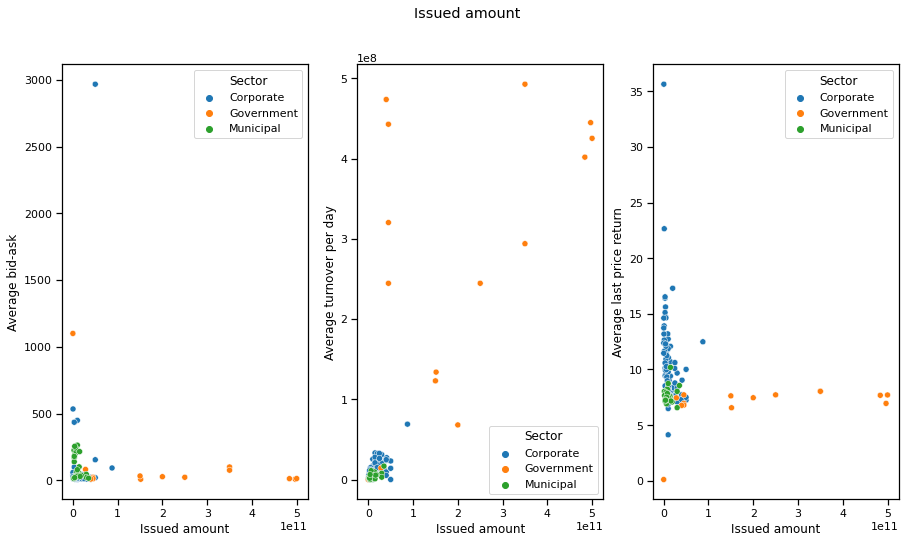

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))

fig.suptitle('Issued amount')

sns.scatterplot(ax=axes[0], x = 'Issued amount', y= 'Average bid-ask', data = bonds, hue = 'Sector');

sns.scatterplot(ax=axes[1], x = 'Issued amount', y= 'Average turnover per day', data = bonds, hue = 'Sector');

sns.scatterplot(ax=axes[2], x = 'Issued amount', y= 'Average last price return', data = bonds, hue = 'Sector');


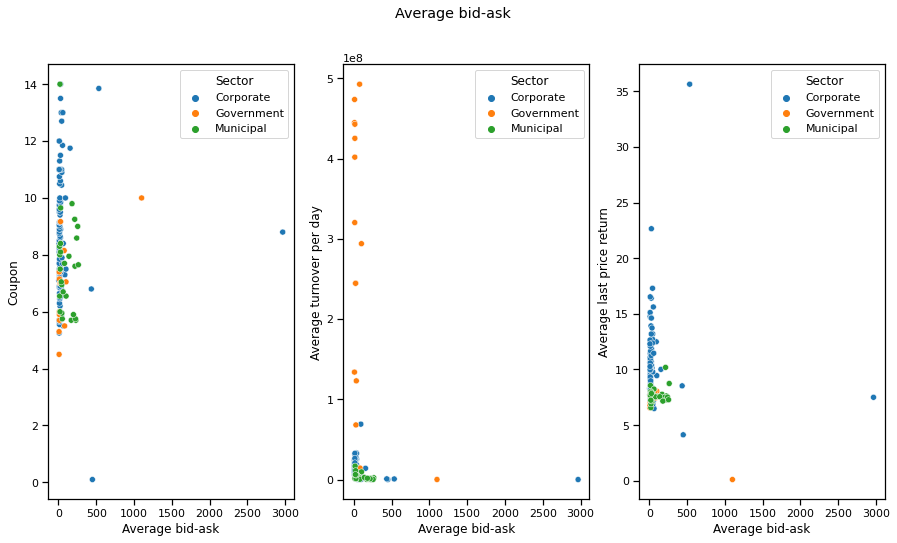

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))

fig.suptitle('Average bid-ask')

sns.scatterplot(ax=axes[0], x = 'Average bid-ask', y= 'Coupon', data = bonds, hue = 'Sector');

sns.scatterplot(ax=axes[1], x = 'Average bid-ask', y= 'Average turnover per day', data = bonds, hue = 'Sector');

sns.scatterplot(ax=axes[2], x = 'Average bid-ask', y= 'Average last price return', data = bonds, hue = 'Sector');

In [25]:
llists = []    
def info30(df, sector = 'Corporate'):
        if(sector == 'Government'):
            x = 14 #сколько дней не работала биржа
        else:
            x = 19
        llists = [sector,
                 df['stock market name'].count().astype(float),
                 df['coupon'].iloc[1], 
                 np.around(100 * (df['quantity'].isna().sum() - x)/(df['stock market name'].count()), decimals = 2),
                 np.around(df['bid-Ask spread'].iloc[0:29].dropna().mean(), decimals = 2), 
                 np.around(df['bid-Ask spread'].iloc[0:29].dropna().var(), decimals = 2), 
                 np.around(df['last price'].iloc[0:29].dropna().var(), decimals = 2),
                 np.around(df['market price'].iloc[0:29].dropna().var(), decimals = 2),
                 
                 np.around(df['turnover'].iloc[0:29].fillna(0).mean(), decimals = 2),
                 np.around(df['turnover'].iloc[0:29].fillna(0).var(), decimals = 2),
                 np.around(df['quantity'].iloc[0:29].fillna(0).mean(), decimals = 2), 
                 np.around(df['quantity'].iloc[0:29].fillna(0).var(), decimals = 2), 
                 np.around(df['volume'].iloc[0:29].fillna(0).mean(), decimals = 2),
                 np.around(df['volume'].iloc[0:29].fillna(0).var(), decimals = 2),
                 np.around(df['g-spread'].iloc[0:29].dropna().mean(), decimals = 2),
                 np.around(df['g-spread'].iloc[0:29].dropna().var(), decimals = 2),
                 np.around(df['accum coupon income'].iloc[0:29].dropna().mean(), decimals = 2),
                 np.around(df['accum coupon income'].iloc[0:29].dropna().var(), decimals = 2)
                 ]
        if (type(df['offer date'][40]) == float):
            llists.append(np.around(df['duration'].iloc[0:29].dropna().mean(), decimals = 2))
            llists.append(np.around(df['duration'].iloc[0:29].dropna().var(), decimals = 2))
            llists.append(np.around(df['last price return'].iloc[0:29].dropna().mean(), decimals = 2))
            llists.append(np.around(df['last price return'].iloc[0:29].dropna().var(), decimals = 2))
            llists.append(0)
        else:
            llists.append(np.around(df['offer duration'].iloc[0:29].dropna().mean(), decimals = 2))
            llists.append(np.around(df['offer duration'].iloc[0:29].dropna().var(), decimals = 2))
            llists.append(np.around(df['offer last price return'].iloc[0:29].dropna().mean(), decimals = 2))
            llists.append(np.around(df['offer last price return'].iloc[0:29].dropna().var(), decimals = 2))
            llists.append(1)
            
        return llists
    
bonds30 = pd.DataFrame(columns = indicators)

extra30 = pd.DataFrame([info30(df1, 'Government'),
                      info30(df2, 'Government'),
                      info30(df3, 'Government'),
                      info30(df4, 'Government'),
                      info30(df5, 'Government'),
                      info30(df6, 'Government'),
                      info30(df7),
                      info30(df8),
                      info30(df9),
                      info30(df10), info30(df11), info30(df12), info30(df13),info30(df14), info30(df15), info30(df16),
                      info30(df17), info30(df18), info30(df19), info30(df20),info30(df21),
                      info30(df22), info30(df23), info30(df24), info30(df25),
                      info30(df26), info30(df27), info30(df28), info30(df29),info30(df30),
                      info30(df31), info30(df32), info30(df33), info30(df34),
                      info30(df35), info30(df36), info30(df37), 
                      info30(df38, 'Municipal'),info30(df39, 'Municipal'), info30(df40, 'Municipal'),
                      info30(df41, 'Municipal'), info30(df42, 'Municipal'), info30(df43, 'Municipal'),
                      info30(df44, 'Government'), info30(df45, 'Government'),
                      info30(df46, 'Government'), info30(df47, 'Government'), info30(df48, 'Government'),
                      info30(df49), info30(df50), info30(df51), info30(df52, 'Municipal'),info30(df53, 'Government'), 
                      info30(df54, 'Government'), info30(df55, 'Government'),
                      info30(df56, 'Government'), info30(df57), info30(df58), info30(df59),info30(df60),
                      #info30(df61),
                      info30(df62), info30(df63), info30(df64),
                      info30(df65), info30(df66), info30(df67), info30(df68),info30(df69),
                      info30(df70), info30(df71), info30(df72), info30(df73),
                      info30(df74), info30(df75), info30(df76), info30(df77),info30(df78),
                      info30(df79), info30(df80), info30(df81),
                      info30(df82, 'Municipal'),info30(df83, 'Municipal'), info30(df84, 'Municipal'),
                      info30(df85, 'Municipal'), info30(df86, 'Municipal'),info30(df87, 'Municipal'),
                      info30(df88, 'Municipal'), info30(df89, 'Municipal'),
                      info30(df90, 'Municipal'), info30(df91, 'Municipal'),info30(df92, 'Municipal'),
                      info30(df93, 'Municipal'), info30(df94, 'Municipal'),
                      info30(df95, 'Municipal'), info30(df96, 'Municipal'),info30(df97, 'Municipal'),
                      info30(df98, 'Municipal'), info30(df99, 'Municipal'),
                      info30(df100, 'Municipal'), info30(df101, 'Municipal'),
                       info30(df102),info30(df103),info30(df104),info30(df105),info30(df106),
                      info30(df107),info30(df108),info30(df109),info30(df110),info30(df111),info30(df112),info30(df113),
                        info30(df114),info30(df115),info30(df116),info30(df117),info30(df118),
                      info30(df119),info30(df120),info30(df121),info30(df122),info30(df123),info30(df124),info30(df125),
                      info30(df126),info30(df127),info30(df128),info30(df129),
                            info30(df130),info30(df131),info30(df132),info30(df133),info30(df134),info30(df135),
                     info30(df136),info30(df137),info30(df138),info30(df139),info30(df140),info30(df141),info30(df142),
                     info30(df143),info30(df144),info30(df145),info30(df146),info30(df147),info30(df148),info30(df149), info30(df150)],
                      columns = indicators, 
                      index = securities)

bonds30 = bonds30.append(extra30)
ddd = bonds30.index.map({'Башнефть, 07' : 'P', 'РУСАЛ Братск, БО-002Р-01' : 'P', 'Металлоинвест, БО-04' : 'C',
       'РЖД, 30': 'P', 'Детский мир, БО-06': 'P', 'Роснефть, 002P-04': 'P',
       'Тинькофф Банк, 001P-03R': 'P', 'Роснефть, 001P-04': 'P',
       'Вертолеты России, БО-03' : 'C', 'ГТЛК, 001P-04': 'P', 'АФК Система, 001P-10': 'P',
       'Банк ВТБ (ПАО), СУБ-Т1-5' : 'C', 'ПР-Лизинг, 002Р-01': 'P', 'Ред Софт, 002Р-02' : 'C',
       'Альфа-Банк, С01-01' : 'C', 'Левенгук, БО-01' : 'P', 'А Девелопмент, 001Р-01' : 'C',
        'АФК Система, 001P-07': 'P', 'АФК Система, 001P-09': 'P', 'АФК Система, 001P-11': 'P',
       'АФК Система, 001P-21': 'P', 'Боржоми Финанс, 001Р-01': 'P', 'ГТЛК, 001P-03': 'P',
       'Газпром Капитал, БО-05': 'P', 'Газпромбанк, 001Р-17Р': 'P',
       'Группа компаний Самолет, БО-П11': 'P', 'МВ Финанс, 001Р-01': 'P',
       'МаксимаТелеком, БО-П01': 'P', 'Сегежа Групп, 002P-01R': 'P',
       'Сегежа Групп, 002P-03R': 'P'}).fillna(0)
bonds30['type'] = ddd
bonds30
sr = []
www = []
pr = []
liqqq = []
for df in dfs:
    sr.append(df['volume'].fillna(0).iloc[0:29].mean())
    pr.append(df['quantity'].fillna(0).iloc[0:29].mean())


q = np.mean(sr)
w = np.mean(pr)
for df in dfs:
    
    www.append(((df['volume'].fillna(0).iloc[0:29].mean() / q) ** 0.03) * ((df['quantity'].fillna(0).iloc[0:29].mean() / w)**0.07))
    minn = min(www)
    maxx = max(www)
for i in range(0, len(www)):
    liqqq.append(100 * (www[i] - minn)/(maxx - minn))
    

bonds30['Issued amount'] = issued_amount
bonds30['Industry'] = industry

bonds30['Rating'] = ratings

bonds['L'] = liqqq  
put_call = ['P', 'P', 'C', 'P', 'P', 'P', 'P', 'P', 'C', 'P', 'P', 'C', 'P', 'C', 'C', 'P', 'C']
        
rat = {'AAA':9,
       'AA+':9,
       'AA':8,
       'AA-':7,
       'A+':7,
       'A':6,
       'A-':6,
       'BBB+':5,
       'BBB':4,
       'BBB-':4,
       'BB+':3,
       'BB':3,
       'No':0}  
ratt = []
for i in ratings:
    ratt.append(rat[i])

bonds30['Rating scores'] = ratt
        
bonds30['L'] = liqqq  
a1 = []
for i in bonds30['L']:
    if (i < 50):
        a1.append(0)
    else:
        a1.append(1)     
bonds30['Is liquid'] = a1
bonds30 = bonds30.sort_values(['Sector','Coupon'])






display(bonds30.head(25))

,Sector,"Age, days",Coupon,"Days without trades, %",Average bid-ask,Bid-Ask variance,Last price volatility,Market price volatility,Average turnover per day,Turnover variance,...,Average last price return,Last price return variance,Offer,type,Issued amount,Industry,Rating,Rating scores,L,Is liquid
"РусГидро, 07",Corporate,492.0,0.10,34.35,959.08,195073.91,32.66,NaN,4329.24,1.430071e+08,...,5.93,57.07,0,0,10000000000,energy,No,0,10.185480,0
"Сбербанк России, 001Р-SBER18",Corporate,352.0,5.25,0.00,10.96,65.96,1.30,1.23,14794438.42,5.485979e+14,...,15.02,2.87,0,0,25000000000,bank,AAA,9,71.534422,1
"Башнефть, 07",Corporate,643.0,5.50,21.00,113.08,4950.87,0.83,1.81,56776.48,5.111198e+09,...,14.50,8.20,1,P,10000000000,oil,AAA,9,26.792345,0
"Сбербанк России, 001Р-SBER19",Corporate,391.0,5.55,0.00,15.24,77.69,2.09,2.00,11490713.99,1.655469e+14,...,12.09,1.17,0,0,18000000000,bank,AAA,9,63.546243,1
"Сбербанк России, 001P-SBER16",Corporate,473.0,5.65,0.00,31.88,658.27,5.13,5.44,7060458.06,5.353448e+13,...,13.63,1.88,0,0,20000000000,bank,AAA,9,61.518326,1
"Сбербанк России, 001Р-SBER17",Corporate,401.0,5.70,0.00,24.35,383.04,4.17,4.38,10984495.19,9.740732e+13,...,14.61,2.62,0,0,40000000000,bank,AAA,9,66.167630,1
"Газпромбанк, 001Р-17Р",Corporate,470.0,5.85,0.00,48.83,1341.65,1.94,1.61,3443450.98,2.516628e+13,...,11.82,0.91,1,P,10630000000,bank,AA+,9,59.789366,1
"ВЭБ.РФ, ПБО-001Р-22",Corporate,355.0,5.95,0.28,40.77,1870.82,4.38,3.50,4431693.83,2.637123e+14,...,14.99,2.45,0,0,25000000000,bank,AAA,9,45.555715,0
"Магнит, БО-002Р-01",Corporate,492.0,6.20,0.00,56.73,2576.92,2.13,1.42,630026.18,9.588417e+11,...,14.01,3.29,0,0,15000000000,food,AA,8,45.531476,0
"Альфа-Банк, 002Р-10",Corporate,329.0,6.20,0.00,17.00,186.29,2.74,2.72,8964778.82,6.132570e+14,...,12.51,1.20,0,0,12000000000,bank,AA+,9,55.702984,1


In [24]:
bonds30.columns

Index(['Sector', 'Age, days', 'Coupon', 'Days without trades, %',
       'Average bid-ask', 'Bid-Ask variance', 'Last price volatility',
       'Market price volatility', 'Average turnover per day',
       'Turnover variance', 'Average trading quantity per day',
       'Trading quantity variance', 'Average trading volume per day',
       'Volume variance', 'Average g-spread', 'G-spread variance',
       'Average accum coupon income', 'Accum coupon income variance',
       'Average duration', 'Duration variance', 'Average last price return',
       'Last price return variance', 'Offer', 'type', 'Issued amount',
       'Industry', 'Rating', 'Rating scores', 'L', 'Is liquid'],
      dtype='object')

In [141]:
bonds30[bonds30['Offer'] == 1].index

Index(['Тинькофф Банк, 001P-03R', 'АФК Система, 001P-10', 'Башнефть, 07',
       'ГТЛК, 001P-04', 'Металлоинвест, БО-04', 'Роснефть, 001P-04',
       'Роснефть, 002P-04', 'РЖД, 30', 'А Девелопмент, 001Р-01',
       'Альфа-Банк, С01-01', 'Банк ВТБ (ПАО), СУБ-Т1-5',
       'Вертолеты России, БО-03', 'Левенгук, БО-01', 'Детский мир, БО-06',
       'РУСАЛ Братск, БО-002Р-01', 'Ред Софт, 002Р-02', 'ПР-Лизинг, 002Р-01',
       'АФК Система, 001P-07', 'АФК Система, 001P-09', 'АФК Система, 001P-11',
       'АФК Система, 001P-21', 'Боржоми Финанс, 001Р-01', 'ГТЛК, 001P-03',
       'Газпром Капитал, БО-05', 'Газпромбанк, 001Р-17Р',
       'Группа компаний Самолет, БО-П11', 'МВ Финанс, 001Р-01',
       'МаксимаТелеком, БО-П01', 'Сегежа Групп, 002P-01R',
       'Сегежа Групп, 002P-03R'],
      dtype='object')

In [145]:
bonds30[bonds30.Sector == 'Corporate'].groupby('type').L.median()

type
0    59.096448
C    22.150342
P    61.676855
Name: L, dtype: float64

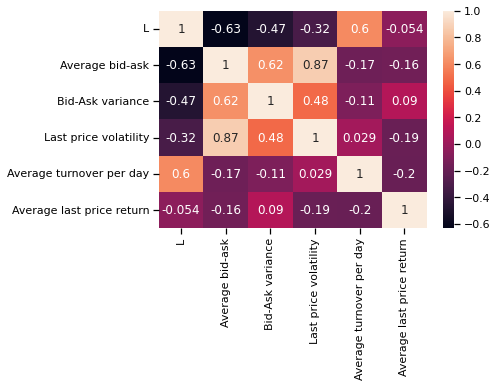

In [12]:
correlations = bonds30[['L','Average bid-ask', 'Bid-Ask variance', 'Last price volatility', 'Average turnover per day', 'Average last price return']].corr() 
# Visualize the correlations as heatmap here
sns.heatmap(correlations, annot=True)
plt.show()

In [ ]:
display(bonds30.L.nsmallest())
display(bonds30.L.nlargest())
#bonds['Weighted Liquidity'].nlargest()

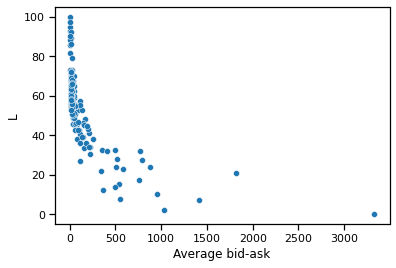

In [149]:
sns.scatterplot(x = 'Average bid-ask', y= 'L', data = bonds30);

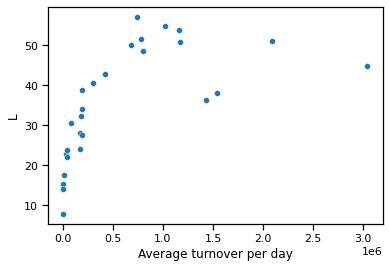

In [150]:
sns.scatterplot(x = 'Average turnover per day', y= 'L', data = bonds30[bonds30['Sector'] == 'Municipal']);

In [151]:
bonds30.groupby('Offer')['L'].mean()
#, 'Weighted Liquidity'

Offer
0    54.843295
1    50.942289
Name: L, dtype: float64

In [ ]:
bonds.head()

In [ ]:
bonds.columns

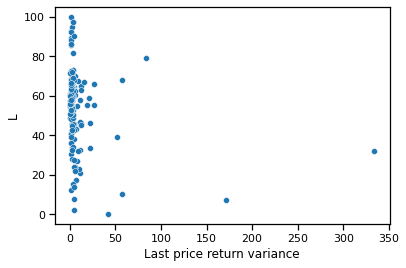

In [153]:
sns.scatterplot(x = 'Last price return variance', y= 'L', data = bonds30);

In [148]:
correlations = bonds30[['Sector', 'Coupon', 'Days without trades, %', 'Average bid-ask',
       'Bid-Ask variance', 'Last price volatility', 'Market price volatility',
       'Average turnover per day', 'Turnover variance',
       'Average trading quantity per day', 'Trading quantity variance',
       'Average trading volume per day', 'Volume variance', 
                        #'Average g-spread',
       'G-spread variance', 'Average accum coupon income',
       'Accum coupon income variance', 'Average duration', 'Duration variance',
       'Average last price return', 'Last price return variance', 'Offer',
       'Issued amount', 'Industry',
       'Rating scores', 'L', 'Is liquid', 'Age, days']].corr() 

#correlations.nlargest(columns = 'L', n = 10)['L']
correlations['L']
#sns.heatmap(correlations, annot=True)
#plt.show()

Coupon                             -0.052360
Days without trades, %             -0.569763
Average bid-ask                    -0.646225
Bid-Ask variance                   -0.490983
Last price volatility              -0.294651
Market price volatility            -0.022309
Average turnover per day            0.526112
Turnover variance                   0.380349
Average trading quantity per day    0.759403
Trading quantity variance           0.471804
Average trading volume per day      0.531305
Volume variance                     0.365490
G-spread variance                  -0.317946
Average accum coupon income        -0.213976
Accum coupon income variance       -0.264699
Average duration                    0.094733
Duration variance                  -0.069307
Average last price return          -0.005109
Last price return variance         -0.207952
Issued amount                       0.405508
Rating scores                      -0.110095
L                                   1.000000
Is liquid 

In [ ]:
correlations1 = bonds30[['Sector', 'Coupon', 'Days without trades, %', 'Average bid-ask',
       'Bid-Ask variance', 'Last price volatility', 'Market price volatility',
       'Average turnover per day', 'Turnover variance',
       'Average trading quantity per day', 'Trading quantity variance',
       'Average trading volume per day', 'Volume variance', #'Average g-spread',
       'G-spread variance', 'Average accum coupon income',
       'Accum coupon income variance', 'Average duration', 'Duration variance',
       'Average last price return', 'Last price return variance', 'Offer',
       'Issued amount', 'Industry',
       'Rating scores', 
                         'L', 'Is liquid', 'Age, days']].corr() 

#correlations.nlargest(columns = 'L', n = 10)['L']
correlations1['L']
#.sort_values(ascending = False)

In [ ]:
correlations2 = bonds30[bonds30['Sector'] == 'Government'][['Sector', 'Coupon', 'Days without trades, %', 'Average bid-ask',
       'Bid-Ask variance', 'Last price volatility', 'Market price volatility',
       'Average turnover per day', 'Turnover variance',
       'Average trading quantity per day', 'Trading quantity variance',
       'Average trading volume per day', 'Volume variance', #'Average g-spread',
       'G-spread variance', 'Average accum coupon income',
       'Accum coupon income variance', 'Average duration', 'Duration variance',
       'Average last price return', 'Last price return variance', 'Offer',
       'Issued amount', 'Industry',
       'Rating scores', 
                         'L', #'Is liquid',
                                                            'Age, days']].corr() 

#correlations.nlargest(columns = 'L', n = 10)['L']
print(correlations2.nlargest(columns = 'L', n = 4)['L'])
correlations2.nsmallest(columns = 'L', n = 4)['L']
#.sort_values(ascending = False)
#correlations2['L']

In [147]:
correlations3 = bonds30[bonds30['Sector'] == 'Corporate'][['Sector', 'Coupon', 'Days without trades, %', 'Average bid-ask',
       'Bid-Ask variance', 'Last price volatility', 'Market price volatility',
       'Average turnover per day', 'Turnover variance',
       'Average trading quantity per day', 'Trading quantity variance',
       'Average trading volume per day', 'Volume variance', #'Average g-spread',
       'G-spread variance', 'Average accum coupon income',
       'Accum coupon income variance', 'Average duration', 'Duration variance',
       'Average last price return', 'Last price return variance', 'Offer',
       'Issued amount', 'Industry',
       'Rating scores', 
                         'L', #'Is liquid',
                                                           'Age, days']].corr() 


correlations3['L']#.sort_values(ascending = False)
print(correlations3.nlargest(columns = 'L', n = 4)['L'])
correlations3.nsmallest(columns = 'L', n = 4)['L']
#sns.heatmap(d, annot=True)
#plt.show()


L                                   1.000000
Average trading quantity per day    0.748666
Average trading volume per day      0.558908
Rating scores                       0.460437
Name: L, dtype: float64


Days without trades, %   -0.702431
Average bid-ask          -0.698890
Bid-Ask variance         -0.584522
Last price volatility    -0.430354
Name: L, dtype: float64

In [ ]:
correlations4 = bonds30[bonds30['Sector'] == 'Municipal'][['Sector', 'Coupon', 'Days without trades, %', 'Average bid-ask',
       'Bid-Ask variance', 'Last price volatility', 'Market price volatility',
       'Average turnover per day', 'Turnover variance',
       'Average trading quantity per day', 'Trading quantity variance',
       'Average trading volume per day', 'Volume variance', #'Average g-spread',
       'G-spread variance', 'Average accum coupon income',
       'Accum coupon income variance', 'Average duration', 'Duration variance',
       'Average last price return', 'Last price return variance', 'Offer',
       'Issued amount', 'Industry',
       'Rating scores', 
                         'L', 'Age, days']].corr() 

#correlations4.nlargest(columns = 'L', n = 10)['L']
print(correlations4.nlargest(columns = 'L', n = 4)['L'])#.sort_values(ascending = False)
correlations4.nsmallest(columns = 'L', n = 4)['L']

In [ ]:
correlations.nsmallest(columns = 'L', n = 10)['L']


In [ ]:
display(bonds.groupby('Sector')['L'].mean().sort_values(ascending = False))
display(bonds.groupby('Sector')['L'].median().sort_values(ascending = False))

In [ ]:
bonds[bonds['Sector'] == 'Municipal']['Issued amount']

In [ ]:
bonds[bonds['Sector'] == 'Municipal']

In [ ]:
bonds[['Average last price return', 'Average bid-ask']].corr()

In [ ]:
bonds.groupby('Rating')['L'].nlargest(3)

In [ ]:
bonds[['L','G-spread variance']].nsmallest(columns = 'L', n=15)

In [146]:
bonds.groupby('Industry')['Issued amount'].sum().sort_values()

Industry
agriculture            1000000000
retail                 3000000000
black metallurgy      10000000000
color metallurgy      10000000000
energy                10200000000
IT                    13050000000
wood                  29000000000
communication         35000000000
other                 40250000000
food                  80000000000
construction         132520145000
financial            132750000000
oil                  147228000000
transport            182650000000
municipal            276023859000
bank                 605831000000
gov                 3135245163600
Name: Issued amount, dtype: int64

In [154]:
(bonds30['Sector'].value_counts())

Corporate     107
Municipal      27
Government     15
Name: Sector, dtype: int64

In [155]:
bonds30[bonds30['Sector'] == 'Municipal']['Issued amount'].sum()
bonds30.groupby('Sector')['L'].nlargest()

Sector                                          
Corporate   Боржоми Финанс, 001Р-01                  78.904797
            Роснефть, 001P-04                        73.159382
            Сбербанк России, 001P-SBER12             73.112015
            Сегежа Групп, 001P-01R                   72.561416
            Группа компаний Самолет, БО-П09          72.023071
Government  Россия, 26207 (ОФЗ-ПД, SU26207RMFS9)    100.000000
            Россия, 26228 (ОФЗ-ПД, SU26228RMFS5)     97.131845
            Россия, 26215 (ОФЗ-ПД, SU26215RMFS2)     97.131845
            Россия, 26227 (ОФЗ-ПД, SU26227RMFS7)     94.710115
            Россия, 26229 (ОФЗ-ПД, SU26229RMFS3)     92.586758
Municipal   Орловская область, 34001                 57.134874
            Московская область, 34011                54.845308
            Москва, 48                               53.781155
            Москва, 72                               51.484854
            Саратовская область, 35001               51.054521
Name: 

In [34]:
d = bonds30[bonds30['Rating scores'] != 0]
d[['Rating scores', 'L']].sort_values('Rating scores', ascending = False)
#d[['Rating scores', 'L']].corr()

,Rating scores,L
"Сбербанк России, 001Р-SBER18",9,71.534422
"Роснефть, 001P-04",9,73.159382
"Роснефть, 05",9,59.792198
"ВЭБ.РФ, ПБО-001P-17",9,54.570088
"Газпромбанк, БО-17",9,57.598215
...,...,...
"Легенда, 001Р-02",4,57.852860
"Альфа-Банк, С01-01",4,2.351665
"Легенда, 001Р-03",4,45.263527
"Коммерческая недвижимость ФПК Гарант-Инвест, 001P-05",3,55.460406


In [156]:
print(bonds30.groupby('Rating').L.mean())
print(bonds30.groupby('Rating').L.median())

Rating
A       59.696805
A+      57.881588
A-      60.675431
AA      35.055953
AA+     43.570410
AA-     45.173445
AAA     56.567589
BB+     50.729806
BBB     43.673131
BBB+    55.740412
BBB-    45.399123
No      58.212393
Name: L, dtype: float64
Rating
A       62.121191
A+      61.266514
A-      63.927370
AA      43.357637
AA+     42.894888
AA-     52.800145
AAA     57.077506
BB+     50.729806
BBB     60.523615
BBB+    55.136243
BBB-    48.069436
No      48.627579
Name: L, dtype: float64


In [36]:
#def info1(df, year = '2020', sector = 'Corporate'):
        if (year == '2022'):
            if(sector == 'Government'):
                x = 14 #сколько дней не работала биржа
            else:
                x = 19
        else:
            x = 0
            
        listss = [sector,
                df.loc[year]['coupon'].iloc[1],
                df.loc[year]['quantity'].isna().sum() - x,
                np.around(df.loc[year]['bid-Ask spread'].dropna().mean(), decimals = 2), 
                np.around(df.loc[year]['bid-Ask spread'].dropna().var(), decimals = 2), 
                np.around(df.loc[year]['last price'].dropna().var(), decimals = 2),
                np.around(df.loc[year]['market price'].dropna().var(), decimals = 2),
                np.around(df.loc[year]['turnover'].dropna().mean(), decimals = 2),
                np.around(df.loc[year]['turnover'].dropna().var(), decimals = 2),
                np.around(df.loc[year]['quantity'].dropna().mean(), decimals = 2), 
                np.around(df.loc[year]['quantity'].dropna().var(), decimals = 2), 
                np.around(df.loc[year]['volume'].dropna().mean(), decimals = 2),
                np.around(df.loc[year]['volume'].dropna().var(), decimals = 2),
                np.around(df.loc[year]['g-spread'].dropna().mean(), decimals = 2),
                np.around(df.loc[year]['g-spread'].dropna().var(), decimals = 2),
                np.around(df.loc[year]['accum coupon income'].dropna().mean(), decimals = 2),
                np.around(df.loc[year]['accum coupon income'].dropna().var(), decimals = 2),
                ]
        if (type(df.loc[year]['offer date'][3]) == float):
                listss.append(np.around(df.loc[year]['duration'].dropna().mean(), decimals = 2))
                listss.append(np.around(df.loc[year]['duration'].dropna().var(), decimals = 2))
                listss.append(np.around(df.loc[year]['last price return'].dropna().mean(), decimals = 2))
                listss.append(np.around(df.loc[year]['last price return'].dropna().var(), decimals = 2))
                listss.append('No')
        else:
                listss.append(np.around(df.loc[year]['offer duration'].dropna().mean(), decimals = 2))
                listss.append(np.around(df.loc[year]['offer duration'].dropna().var(), decimals = 2))
                listss.append(np.around(df.loc[year]['offer last price return'].dropna().mean(), decimals = 2))
                listss.append(np.around(df.loc[year]['offer last price return'].dropna().var(), decimals = 2))
                listss.append('Yes')
        return listss
 
    
bonds2 = pd.DataFrame(columns = indicators)

extra2022 = pd.DataFrame([info1(df1, '2022', 'Government'),
                      info1(df2, '2022', 'Government'),
                      info1(df3, '2022', 'Government'),
                      info1(df4, '2022', 'Government'),
                      #info1(df5, '2022', 'Government'),
                      info1(df6, '2022', 'Government'),
                      info1(df7, '2022'),
                      info1(df8, '2022'),
                      info1(df9, '2022'),
                      info1(df10, '2022'), info1(df11, '2022'), info1(df12, '2022'), info1(df13, '2022'),info1(df14, '2022'),
                      info1(df15, '2022'), info1(df16, '2022'),
                      info1(df17, '2022'), info1(df18, '2022'), info1(df19, '2022'), info1(df20, '2022'),info1(df21, '2022'),
                      info1(df22, '2022'), info1(df23, '2022'), info1(df24, '2022'), info1(df25, '2022'),
                      info1(df26, '2022'), info1(df27, '2022'), info1(df28, '2022'), info1(df29, '2022'),info1(df30, '2022'),
                      info1(df31, '2022'), info1(df32, '2022'), info1(df33, '2022'), info1(df34, '2022'),
                      info1(df35, '2022'), info1(df36, '2022'), info1(df37, '2022'), 
                      info1(df38, '2022', 'Municipal'), info1(df39, '2022', 'Municipal'), info1(df40, '2022', 'Municipal'),
                      info1(df41, '2022', 'Municipal'), info1(df42, '2022', 'Municipal'), info1(df43, '2022', 'Municipal'),
                      info1(df44, '2022', 'Government'), info1(df45, '2022', 'Government'),
                      info1(df46, '2022', 'Government'), info1(df47, '2022', 'Government'), info1(df48, '2022', 'Government')],
                      columns = indicators, 
                      index = securities)

extra2021 = pd.DataFrame([info1(df1, '2021', 'Government'),
                      info1(df2, '2021', 'Government'),
                      info1(df3, '2021', 'Government'),
                      info1(df4, '2021', 'Government'),
                      #info1(df5, '2021', 'Government'),
                      info1(df6, '2021', 'Government'),
                      info1(df7, '2021'),
                      info1(df8, '2021'),
                      info1(df9, '2021'),
                      info1(df10, '2021'), info1(df11, '2021'), info1(df12, '2021'), info1(df13, '2021'),info1(df14, '2021'),
                      info1(df15, '2021'), info1(df16, '2021'),
                      info1(df17, '2021'), info1(df18, '2021'), info1(df19, '2021'), info1(df20, '2021'),info1(df21, '2021'),
                      info1(df22, '2021'), info1(df23, '2021'), info1(df24, '2021'), info1(df25, '2021'),
                      info1(df26, '2021'), info1(df27, '2021'), info1(df28, '2021'), info1(df29, '2021'),info1(df30, '2021'),
                      info1(df31, '2021'), info1(df32, '2021'), info1(df33, '2021'), info1(df34, '2021'),
                      info1(df35, '2021'), info1(df36, '2021'), info1(df37, '2021'), 
                      info1(df38, '2021', 'Municipal'), info1(df39, '2021', 'Municipal'), info1(df40, '2021', 'Municipal'),
                      info1(df41, '2021', 'Municipal'), info1(df42, '2021', 'Municipal'), info1(df43, '2021', 'Municipal'),
                      info1(df44, '2021', 'Government'), info1(df45, '2021', 'Government'),
                      info1(df46, '2021', 'Government'), info1(df47, '2021', 'Government'), info1(df48, '2021', 'Government')],
                      columns = indicators, 
                      index = securities)


bonds2022 = bonds2.append(extra2022).sort_values(['Sector','Coupon'])
bonds2021 = bonds2.append(extra2021).sort_values(['Sector','Coupon'])


display(bonds2022.head())
#display(bonds2021.head())


IndentationError: unexpected indent (Temp/ipykernel_28284/3535555094.py, line 2)

In [37]:
#extra2020 = pd.DataFrame([info1(df1, '2020', 'Government'),
#                      info1(df2,'2020', 'Government'),
#                      info1(df3, '2020','Government'),
#                      info1(df4, '2020','Government'),
#                      #info1(df5, '2020','Government'),
#                      info1(df6, '2020','Government'),
#                      info1(df7),
#                      #info1(df8),
#                      info1(df9),
#                      info1(df10), info1(df11), info1(df12),
#                      info1(df13),info1(df14), info1(df15), info1(df16),
#                      info1(df17), info1(df18), info1(df19), info1(df20),info1(df21),
#                      info1(df22), info1(df23), info1(df24), info1(df25),
#                      info1(df26), info1(df27), info1(df28), info1(df29),info1(df30),
#                      info1(df31), info1(df32), info1(df33), info1(df34),
#                      info1(df35), info1(df36), info1(df37), 
#                      info1(df38, '2020', 'Municipal'),info1(df39, '2020', 'Municipal'), info1(df40, '2020', 'Municipal'),
#                      info1(df41, '2020', 'Municipal'), info1(df42, '2020', 'Municipal'), info1(df43, '2020', 'Municipal'),
#                      info1(df44, '2020', 'Government'), info1(df45, '2020', 'Government'),
#                      info1(df46, '2020', 'Government'), info1(df47, '2020', 'Government'), info1(df48, '2020', 'Government')],
#                      columns = indicators, 
#                      index = securities)
#bonds2020 = bonds2.append(extra2020).sort_values(['Sector','Coupon'])
#display(bonds2020.head(10))

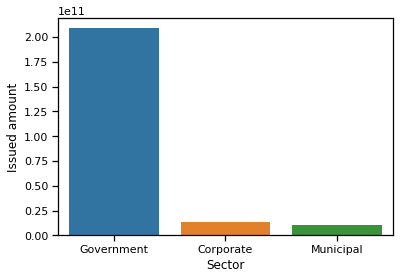

In [157]:
sns.barplot(data = bonds30, x = 'Sector', y = 'Issued amount', ci = None, order = ['Government', 'Corporate', 'Municipal']);

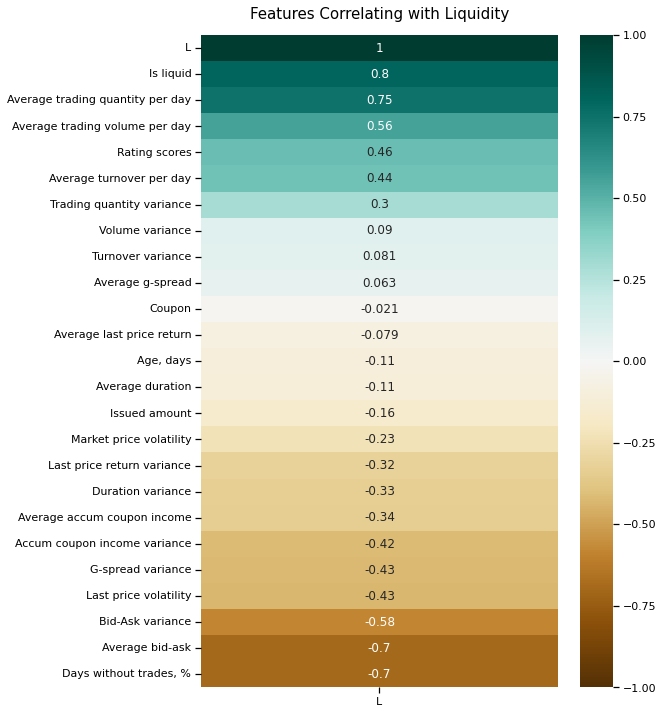

In [159]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(bonds30[bonds30.Sector == 'Corporate'].corr()[['L']].sort_values(by='L', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Features Correlating with Liquidity', fontdict={'fontsize':15}, pad=16);

In [40]:
df1.iloc[0:29].head()
L1 = 0
for i in range(0,29):
    L1 = L1 + df1.volume[i] / (df1['bid-Ask spread'][i] / df1['bid'][i] + df1['ask'][i])
L1   

175.14284487497957

In [41]:
df1.columns

Index(['stock market name', 'bid', 'ask', 'bid-Ask spread', 'avg price',
       'opening price', 'min price', 'max price', 'last price',
       'avg weight price', 'market price', 'pension market price',
       'admitted quote', 'closing price', 'ind price', 'ind price type',
       'turnover', 'quantity', 'volume', 'coupon', 'maturity date',
       'ind price return', 'bid price return', 'ask price return',
       'last price return', 'closing price return', 'accum coupon income',
       'duration', 'modified duration', 'offer date', 'offer ind price return',
       'offer bid price return', 'offer ask price return',
       'offer last price return', 'offer closing price return',
       'offer duration', 'modified offer duraton', 'g-spread', 'g-spread2',
       'g-spread benchmark'],
      dtype='object')

In [42]:
bonds[bonds.Offer == 1].index

Index(['Башнефть, 07', 'РУСАЛ Братск, БО-002Р-01', 'Металлоинвест, БО-04',
       'РЖД, 30', 'Детский мир, БО-06', 'Роснефть, 002P-04',
       'Тинькофф Банк, 001P-03R', 'Роснефть, 001P-04',
       'Вертолеты России, БО-03', 'ГТЛК, 001P-04', 'АФК Система, 001P-10',
       'Банк ВТБ (ПАО), СУБ-Т1-5', 'ПР-Лизинг, 002Р-01', 'Ред Софт, 002Р-02',
       'Альфа-Банк, С01-01', 'Левенгук, БО-01', 'А Девелопмент, 001Р-01'],
      dtype='object')

In [44]:
dic = {'Башнефть, 07' : 'P', 'РУСАЛ Братск, БО-002Р-01' : 'P', 'Металлоинвест, БО-04' : 'C',
       'РЖД, 30': 'P', 'Детский мир, БО-06': 'P', 'Роснефть, 002P-04': 'P',
       'Тинькофф Банк, 001P-03R': 'P', 'Роснефть, 001P-04': 'P',
       'Вертолеты России, БО-03' : 'C', 'ГТЛК, 001P-04': 'P', 'АФК Система, 001P-10': 'P',
       'Банк ВТБ (ПАО), СУБ-Т1-5' : 'C', 'ПР-Лизинг, 002Р-01': 'P', 'Ред Софт, 002Р-02' : 'C',
       'Альфа-Банк, С01-01' : 'C', 'Левенгук, БО-01' : 'P', 'А Девелопмент, 001Р-01' : 'C'}

In [45]:
ddd = bonds30.index.map({'Башнефть, 07' : 'P', 'РУСАЛ Братск, БО-002Р-01' : 'P', 'Металлоинвест, БО-04' : 'C',
       'РЖД, 30': 'P', 'Детский мир, БО-06': 'P', 'Роснефть, 002P-04': 'P',
       'Тинькофф Банк, 001P-03R': 'P', 'Роснефть, 001P-04': 'P',
       'Вертолеты России, БО-03' : 'C', 'ГТЛК, 001P-04': 'P', 'АФК Система, 001P-10': 'P',
       'Банк ВТБ (ПАО), СУБ-Т1-5' : 'C', 'ПР-Лизинг, 002Р-01': 'P', 'Ред Софт, 002Р-02' : 'C',
       'Альфа-Банк, С01-01' : 'C', 'Левенгук, БО-01' : 'P', 'А Девелопмент, 001Р-01' : 'C'}).fillna(0)
bonds30['type'] = ddd
bonds30
#bonds30[bonds30['Sector'] == 'Corporate'].groupby('type')['L'].median()[['C', 'P']]

,Sector,"Age, days",Coupon,"Days without trades, %",Average bid-ask,Bid-Ask variance,Last price volatility,Market price volatility,Average turnover per day,Turnover variance,...,Average last price return,Last price return variance,Offer,Issued amount,Industry,Rating,Rating scores,L,Is liquid,type
"РусГидро, 07",Corporate,492.0,0.10,34.35,959.08,195073.91,32.66,NaN,4329.24,1.430071e+08,...,5.93,57.07,0,10000000000,energy,No,0,10.185480,0,0
"Сбербанк России, 001Р-SBER18",Corporate,352.0,5.25,0.00,10.96,65.96,1.30,1.23,14794438.42,5.485979e+14,...,15.02,2.87,0,25000000000,bank,AAA,9,71.534422,1,0
"Башнефть, 07",Corporate,643.0,5.50,21.00,113.08,4950.87,0.83,1.81,56776.48,5.111198e+09,...,14.50,8.20,1,10000000000,oil,AAA,9,26.792345,0,P
"Сбербанк России, 001P-SBER16",Corporate,473.0,5.65,0.00,31.88,658.27,5.13,5.44,7060458.06,5.353448e+13,...,13.63,1.88,0,20000000000,bank,AAA,9,61.518326,1,0
"Сбербанк России, 001Р-SBER17",Corporate,401.0,5.70,0.00,24.35,383.04,4.17,4.38,10984495.19,9.740732e+13,...,14.61,2.62,0,40000000000,bank,AAA,9,66.167630,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Хабаровский край, 35007",Municipal,495.0,9.00,34.34,791.93,319214.71,15.70,7.36,191563.30,4.480544e+11,...,12.35,5.23,0,4073859000,municipal,BBB-,4,27.604761,0,0
"Нижегородская область, 35016",Municipal,114.0,9.25,1.75,493.61,69934.84,27.82,19.90,186104.94,1.319289e+11,...,11.89,2.94,0,15000000000,municipal,A,6,32.356523,0,0
"Московская область, 35010",Municipal,495.0,9.65,0.20,43.76,1142.40,2.99,3.20,805683.67,1.504553e+12,...,13.50,3.22,0,16250000000,municipal,AA+,9,48.607850,0,0
"Свердловская область, 35003",Municipal,495.0,9.80,30.30,497.86,42713.98,8.40,0.02,6173.03,1.680690e+08,...,11.83,5.21,0,3000000000,municipal,AA-,7,14.070151,0,0


In [46]:
bonds30[bonds30['Sector'] == 'Corporate'].groupby('type')['L'].mean()[['C', 'P']]

type
C    19.906423
P    54.082054
Name: L, dtype: float64

In [160]:
bonds30[bonds30.Sector == 'Corporate'].corr().L

Age, days                          -0.108935
Coupon                             -0.021394
Days without trades, %             -0.702431
Average bid-ask                    -0.698890
Bid-Ask variance                   -0.584522
Last price volatility              -0.430354
Market price volatility            -0.231717
Average turnover per day            0.442900
Turnover variance                   0.080623
Average trading quantity per day    0.748666
Trading quantity variance           0.296639
Average trading volume per day      0.558908
Volume variance                     0.089579
Average g-spread                    0.062553
G-spread variance                  -0.427215
Average accum coupon income        -0.336282
Accum coupon income variance       -0.415066
Average duration                   -0.113433
Duration variance                  -0.332478
Average last price return          -0.079355
Last price return variance         -0.317614
Issued amount                      -0.159906
Rating sco

In [162]:
bonds30.groupby('Industry')['L'].mean().sort_values()

Industry
energy              28.425370
municipal           35.547183
black metallurgy    39.018587
retail              42.884494
other               45.326859
transport           47.787265
communication       51.836196
agriculture         54.619164
bank                54.843494
oil                 55.910198
IT                  56.208228
financial           57.893596
construction        58.652759
color metallurgy    62.475346
food                62.984915
wood                64.991742
gov                 80.700942
Name: L, dtype: float64

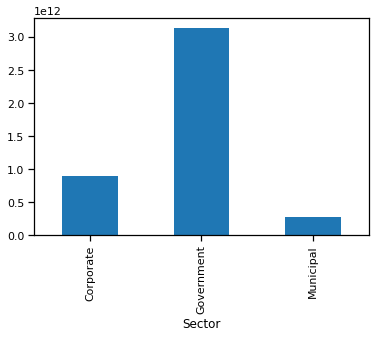

In [49]:
bonds30.groupby('Sector')['Issued amount'].sum().plot.bar();

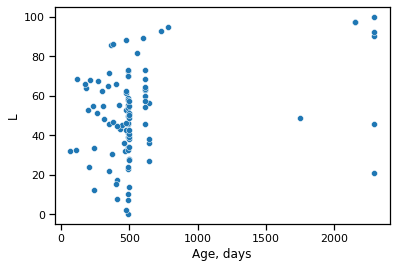

In [50]:
sns.scatterplot(data = bonds30, y = 'L', x = 'Age, days');

In [51]:
print(bonds30.groupby('Sector')['L'].mean())
bonds30.groupby('Sector')['L'].median()


Sector
Corporate     49.904976
Government    80.700942
Municipal     35.547183
Name: L, dtype: float64


Sector
Corporate     54.594626
Government    89.188592
Municipal     36.315386
Name: L, dtype: float64

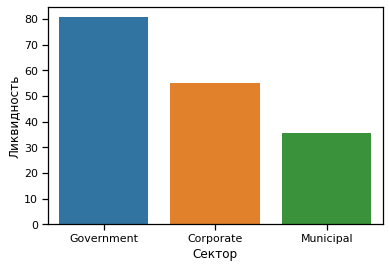

In [163]:
g = sns.barplot(data = bonds30, x = 'Sector', y = 'L', ci = None);
g.set(xlabel='Сектор', ylabel='Ликвидность')
plt.show()

In [164]:
#bonds30['med'] =
q = bonds30.groupby('Sector').L.median().values
w = bonds30.groupby('Sector').L.mean().values
b = ["Корпоративный", 'Государственный', 'Муниципальный']
#bonds30['med']

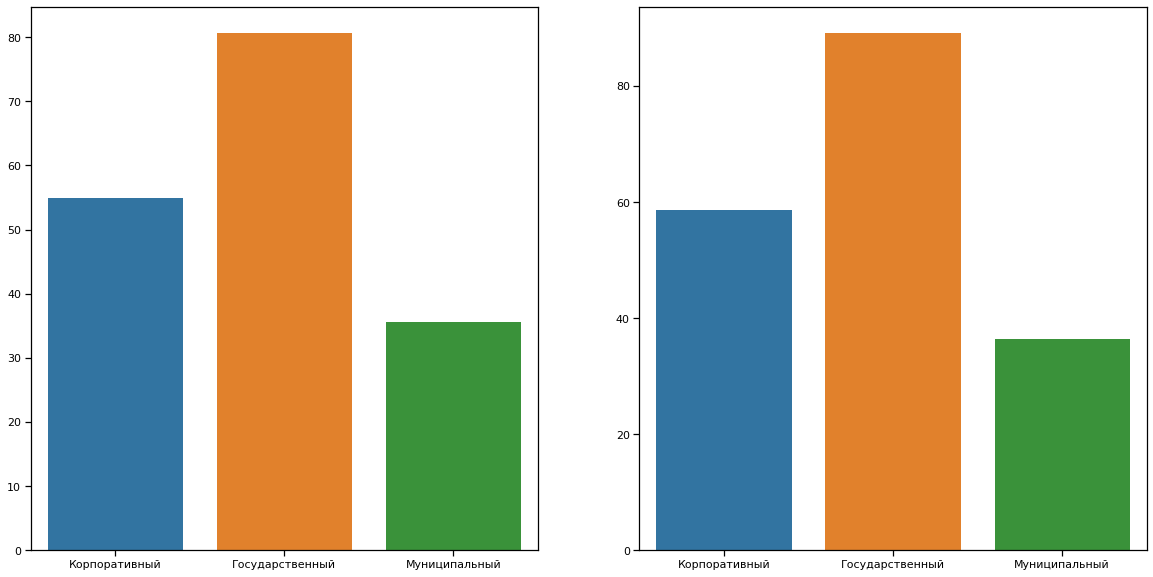

In [165]:

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.barplot(ax = axes[1], x=b, y=q, ci = None);
sns.barplot(ax=axes[0], x=b, y=w, ci = None);
#ax.set(xlabel='common xlabel', ylabel='common ylabel')

In [166]:
bonds30.groupby(['Sector', 'Rating']).L.mean()

Sector      Rating
Corporate   A         62.734614
            A+        58.402208
            A-        65.615416
            AA        44.170009
            AA+       52.135536
            AA-       59.717138
            AAA       58.056614
            BB+       50.729806
            BBB       43.673131
            BBB+      58.450195
            BBB-      51.558193
            No        32.346954
Government  No        80.700942
Municipal   A         32.356523
            A+        50.072293
            A-        39.268831
            AA         7.713784
            AA+       36.075924
            AA-       25.781854
            AAA       42.670017
            BBB+      44.901283
            BBB-      39.240053
            No        57.134874
Name: L, dtype: float64

In [89]:
s = []
ww = []
p = []
liqq = []
for df in dfs:
    s.append(df['volume'].iloc[0:29].mean())
    p.append(df['quantity'].iloc[0:29].mean())

q = np.mean(sr)
w = np.mean(pr)
for df in dfs:
    
    ww.append(((df['volume'].iloc[0:29].mean() / q) ** 0.03) * ((df['quantity'].iloc[0:29].mean() / w)**0.07))
    minn = min(ww)
    maxx = max(ww)
for i in range(0, len(ww)):
    liqq.append(100 * (ww[i] - minn)/(maxx - minn))

In [91]:
def get_l(i):
    for j in range(0,3):
        s = []
        ww = []
        p = []
        for df in dfs:
            s.append(df['volume'].iloc[(0+30*j):(29+30*j)].mean())
            p.append(df['quantity'].iloc[(0+30*j):(29+30*j)].mean())
        
        q = np.mean(s)
        w = np.mean(p)
        for df in dfs:
        
            ww.append(((df['volume'].iloc[(0+30*j):(29+30*j)].mean() / q) ** 0.03) * ((df['quantity'].iloc[(0+30*j):(29+30*j)].mean() / w)**0.07))
            minn = min(ww)
            maxx = max(ww)
        #liqq.append( 100 * (((dfs['volume'].iloc[(0+j):(29+j)].mean() / q) ** 0.03) * ((dfs['quantity'].iloc[(0+j):(29+j)].mean() / w)**0.07)) / (maxx - minn))
        liqq.append(100 * (ww[i] - minn)/(maxx - minn))
    return(liqq)
get_l(1)


[40.11791586159583,
 83.96847374242317,
 79.95109056967894,
 88.07724359540461,
 13.371345403731082,
 43.34679997570015,
 66.74281591741862,
 66.59116343822335,
 49.388433785381594,
 68.26677078788352,
 21.117256937117553,
 41.51623690316838,
 51.299877222759996,
 41.249730335402305,
 62.335498317183394,
 54.675943372065554,
 63.85313177211683,
 46.18674902897787,
 41.222706301999594,
 33.96147033041026,
 66.5434525723279,
 49.121750120040325,
 44.17234111494708,
 53.46372109163702,
 72.02512677436196,
 61.248297459379415,
 57.12202042476187,
 36.37546895644164,
 60.637375975690084,
 71.97231768787191,
 68.37190815835461,
 59.046484978698956,
 64.23000530435334,
 70.21345582653971,
 61.55784310103303,
 71.358453676558,
 28.378376211375397,
 5.2205568013673345,
 14.859815916903493,
 16.969069537251677,
 10.746003555489366,
 20.874220489135418,
 19.560649758807386,
 87.08323168928939,
 91.82472093466728,
 96.83701532709387,
 94.16634590026625,
 84.62279232710472,
 32.82784050260844,
 5.7

In [92]:
listgov = [df1.asfreq('BM'),df2.asfreq('BM'),df3.asfreq('BM'),df4.asfreq('BM'),df6.asfreq('BM'),df44.asfreq('BM'),
           df45.asfreq('BM'),df46.asfreq('BM'),df47.asfreq('BM'),df48.asfreq('BM')]

listcor = [df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29,df30,
          df31,df32,df33,df34,df35,df36,df37,df49,df50,df51, df57, df58, df59,df60,df62, df63, df64, df65,df66,df67,df68,df69,df70,
          df71, df72, df73, df74, df75, df76, df77, df78, df79, df80, df81]

listmun = [df38,df39,df40,df41,df42,df43, df82, df83, df84, df85, df86, df87, df88, df89, df90, df91,
          df92, df93, df94, df95, df96, df97, df98, df99, df100, df101]
gov = pd.concat(listgov, axis = 0)
cor = pd.concat(listcor, axis = 0)
mun = pd.concat(listmun, axis = 0)

In [94]:
bonds[bonds['Sector'] == 'Corporate']['Age, days'].nlargest(13).index

Index(['Башнефть, 07', 'РЖД, 30', 'Башнефть, 06', 'РЖД, 23',
       'Сбербанк России, 001P-06R', 'Роснефть, 002P-04', 'Роснефть, 05',
       'ВЭБ.РФ, ПБО-001P-17', 'Газпромбанк, БО-17', 'Тинькофф Банк, 001P-03R',
       'Буровая компания Евразия, БО-001P-03', 'Роснефть, 001P-04',
       'ГТЛК, 001P-04'],
      dtype='object')

In [98]:
dffff = pd.DataFrame()
mm = []

In [41]:
dffff = pd.DataFrame()
mm = []
def get_l(num):
    
    for j in range(0,66):
        liqq = []
       
        s = []
        ww = []
        p = []
        for df in dfs:
            s.append(df['volume'].fillna(0).iloc[(0+j):(29+j)].mean())
            p.append(df['quantity'].fillna(0).iloc[(0+j):(29+j)].mean())
        
        q = np.mean(s)
        w = np.mean(p)
        for df in dfs:
            if (df['volume'].fillna(0).iloc[(0+j):(29+j)].mean() == df['volume'].fillna(0).iloc[(0+j):(29+j)].mean()):
                ww.append(((df['volume'].fillna(0).iloc[(0+j):(29+j)].mean() / q) ** 0.03) * ((df['quantity'].fillna(0).iloc[(0+j):(29+j)].mean() / w)**0.07))
                ww = [x for x in ww if x!=0]
                minn = min(ww)
                maxx = max(ww)
        #ww = [x for x in ww if x == x]
        #print(len(ww))
        #liqq.append( 100 * (((dfs['volume'].iloc[(0+j):(29+j)].mean() / q) ** 0.03) * ((dfs['quantity'].iloc[(0+j):(29+j)].mean() / w)**0.07)) / (maxx - minn))
        #print(ww)
        #print(len(num))
        for i in num:
            liqq.append(100 * (ww[i] - minn)/(maxx - minn))
        lo = [x for x in liqq if x == x]
        
        mm.append(np.mean(lo))
    dffff['mm'] = mm[::-1]
    plt.plot(dffff['mm']);
    plt.ylabel('Ликвидность')
    plt.xlabel('Муниципальный сектор')
    plt.xticks([])
    plt.show()
    
get_l(numm)



IndexError: list index out of range

In [38]:
numg = list(range(1,7))
numg.extend(list(range(44,49)))
numg.extend(list(range(53, 57)))

In [39]:
numm = list(range(38,44))
numm.extend(list(range(82,101)))

In [40]:
len(df1.index[0:66])

66

In [103]:
numm

[38,
 39,
 40,
 41,
 42,
 43,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

In [104]:
day = datetime.datetime.strftime(df1.index, '%d.%m')
day

TypeError: descriptor 'strftime' for 'datetime.date' objects doesn't apply to a 'DatetimeIndex' object

In [105]:
df1.index

DatetimeIndex(['2022-05-04', '2022-04-29', '2022-04-28', '2022-04-27',
               '2022-04-26', '2022-04-25', '2022-04-22', '2022-04-21',
               '2022-04-20', '2022-04-19',
               ...
               '2013-04-05', '2013-04-04', '2013-04-03', '2013-04-02',
               '2013-04-01', '2013-03-29', '2013-03-28', '2013-03-27',
               '2013-03-26', '2013-03-25'],
              dtype='datetime64[ns]', name='date', length=2294, freq=None)

In [106]:
numg

[1, 2, 3, 4, 5, 6, 44, 45, 46, 47, 48, 53, 54, 55, 56]

In [107]:
bonds30.columns

Index(['Sector', 'Age, days', 'Coupon', 'Days without trades, %',
       'Average bid-ask', 'Bid-Ask variance', 'Last price volatility',
       'Market price volatility', 'Average turnover per day',
       'Turnover variance', 'Average trading quantity per day',
       'Trading quantity variance', 'Average trading volume per day',
       'Volume variance', 'Average g-spread', 'G-spread variance',
       'Average accum coupon income', 'Accum coupon income variance',
       'Average duration', 'Duration variance', 'Average last price return',
       'Last price return variance', 'Offer', 'Issued amount', 'Industry',
       'Rating', 'Rating scores', 'L', 'Is liquid', 'type'],
      dtype='object')

In [108]:
proxies:Average bid-ask, Bid-Ask variance, Average turnover per day, Average trading quantity per day,
    Average trading volume per day

SyntaxError: invalid syntax (Temp/ipykernel_27128/1518467359.py, line 1)

In [167]:
q = bonds30[bonds30['Sector'] == 'Corporate'][['Last price volatility','Age, days', 'Coupon', 'Days without trades, %', 'G-spread variance', 'Average duration', 'L', 'Issued amount',
'Average last price return', 'Average duration','Last price return variance', 'Rating scores', 'Average accum coupon income']].corr().L
#sns.heatmap(q);
q

Last price volatility         -0.430354
Age, days                     -0.108935
Coupon                        -0.021394
Days without trades, %        -0.702431
G-spread variance             -0.427215
Average duration              -0.113433
L                              1.000000
Issued amount                 -0.159906
Average last price return     -0.079355
Average duration              -0.113433
Last price return variance    -0.317614
Rating scores                  0.460437
Average accum coupon income   -0.336282
Name: L, dtype: float64

In [110]:
bonds30[bonds30['Sector'] == 'Government'][['Last price volatility','Age, days', 'Coupon', 'Days without trades, %', 'G-spread variance', 'Average duration', 'L', 'Issued amount',
'Average last price return', 'Average duration', 'Last price return variance', 'Rating scores', 'Average accum coupon income']].corr().L

Last price volatility         -0.637109
Age, days                     -0.273358
Coupon                        -0.436849
Days without trades, %        -0.737638
G-spread variance             -0.734919
Average duration               0.155797
L                              1.000000
Issued amount                  0.337420
Average last price return      0.755253
Average duration               0.155797
Last price return variance    -0.518956
Rating scores                       NaN
Average accum coupon income   -0.520298
Name: L, dtype: float64

In [111]:
bonds30[bonds30['Sector'] == 'Corporate'].groupby('type')['L'].mean()

type
0    53.174328
C    19.906423
P    54.082054
Name: L, dtype: float64

In [112]:
abs(bonds30[bonds30['Sector'] == 'Municipal'].corr().L).sort_values()

Average g-spread                    0.000986
Market price volatility             0.025204
Accum coupon income variance        0.176513
Rating scores                       0.223856
Age, days                           0.229665
Turnover variance                   0.240797
Coupon                              0.254240
Issued amount                       0.318640
Average accum coupon income         0.339193
Volume variance                     0.344551
Average duration                    0.378808
Duration variance                   0.472752
Last price volatility               0.524602
Bid-Ask variance                    0.552442
Last price return variance          0.574303
Trading quantity variance           0.585501
Average turnover per day            0.623050
Average trading volume per day      0.686535
G-spread variance                   0.702337
Is liquid                           0.732532
Average last price return           0.740227
Days without trades, %              0.831429
Average bi

In [113]:
bonds30[bonds30['Sector'] == 'Municipal'].corr().L.sort_values()

Average bid-ask                    -0.839746
Days without trades, %             -0.831429
G-spread variance                  -0.702337
Last price return variance         -0.574303
Bid-Ask variance                   -0.552442
Last price volatility              -0.524602
Duration variance                  -0.472752
Average duration                   -0.378808
Rating scores                      -0.223856
Average g-spread                    0.000986
Market price volatility             0.025204
Accum coupon income variance        0.176513
Age, days                           0.229665
Turnover variance                   0.240797
Coupon                              0.254240
Issued amount                       0.318640
Average accum coupon income         0.339193
Volume variance                     0.344551
Trading quantity variance           0.585501
Average turnover per day            0.623050
Average trading volume per day      0.686535
Is liquid                           0.732532
Average la

In [118]:
bonds30.groupby('Sector')['Issued amount'].sum().plot();

AttributeError: 'Series' object has no attribute 'barplot'

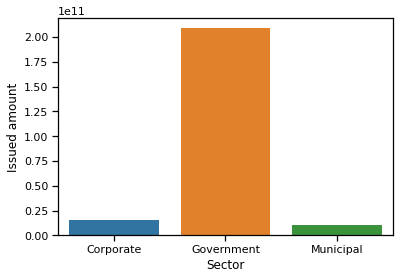

In [123]:
sns.barplot(data = bonds30, x = 'Sector', y = 'Issued amount', ci = None);

In [130]:
bonds30[bonds30['Sector'] == 'Government'][['Age, days', 'Coupon', 'Days without trades, %',
         'Last price volatility',
       'Market price volatility',  
         'G-spread variance',
       'Average duration', 'Duration variance', 'Average last price return',
       'Last price return variance', 'Offer', 'Issued amount',
        'Rating scores', 'L']].corr().L

Age, days                    -0.273358
Coupon                       -0.436849
Days without trades, %       -0.737638
Last price volatility        -0.637109
Market price volatility      -0.224094
G-spread variance            -0.734919
Average duration              0.155797
Duration variance            -0.175607
Average last price return     0.755253
Last price return variance   -0.518956
Issued amount                 0.337420
Rating scores                      NaN
L                             1.000000
Name: L, dtype: float64

In [25]:
df1[df1.index.year == 2022]

,stock market name,bid,ask,bid-Ask spread,avg price,opening price,min price,max price,last price,avg weight price,...,offer ind price return,offer bid price return,offer ask price return,offer last price return,offer closing price return,offer duration,modified offer duraton,g-spread,g-spread2,g-spread benchmark
date,,,,,,,,,,,,,,,,,,,,,
2022-05-04,Московская биржа Т+,96.701,97.1,39.9,96.9005,96.5,96.5,97.15,97.149,97.112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-133.739092,NaN,NaN
2022-04-29,Московская биржа Т+,96.99,97,1.0,96.995,96.036,96.036,97,97,96.992,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-67.501195,NaN,NaN
2022-04-28,Московская биржа Т+,96.731,96.994,26.3,96.8625,96.605,96.605,96.994,96.994,96.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.125209,NaN,NaN
2022-04-27,Московская биржа Т+,96.55,96.599,4.9,96.5745,97.199,96.573,97.199,96.599,96.911,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-91.990365,NaN,NaN
2022-04-26,Московская биржа Т+,96.408,96.785,37.7,96.5965,96.791,96.161,96.791,96.785,96.621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-79.522452,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-10,Московская биржа Т+,97.9,98.677,77.7,98.2885,98.885,97.86,98.886,98.67,98.078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-92.112929,NaN,NaN
2022-01-06,Московская биржа Т+,98.025,98.3,27.5,98.1625,97.691,97.691,98.991,98.991,97.848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.806106,NaN,NaN
2022-01-05,Московская биржа Т+,97.583,98.298,71.5,97.9405,98.807,97.6,98.809,98,98.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-62.67561,NaN,NaN


In [29]:
for i in listcor:
    if 

101.06127731092437
97.7651515151515
96.30346590909095
103.3960676532771
99.0976886035315
102.57897478991593
102.80433613445366
96.1894345238095
104.3683025210083
100.57235294117652
95.1389032258064
100.21938559322041
99.04526427061312
97.13565677966093
97.24129533678754
99.81585903083706
94.17792517006805
102.96430976430977
103.73011764705886
101.40257142857139
102.36655462184879
97.36292372881351
101.37845378151266
101.76643923240944
98.62298097251583
96.61678414096919
96.86963350785338
96.37101360544226
97.14928571428567
99.13731501057082
99.94957627118639


In [30]:
#bonds30[bonds30.Sector == 'Corporate']

,Sector,"Age, days",Coupon,"Days without trades, %",Average bid-ask,Bid-Ask variance,Last price volatility,Market price volatility,Average turnover per day,Turnover variance,...,Duration variance,Average last price return,Last price return variance,Offer,Issued amount,Industry,Rating,Rating scores,L,Is liquid
"РусГидро, 07",Corporate,492.0,0.10,34.35,959.08,195073.91,32.66,NaN,4329.24,1.430071e+08,...,146.07,5.93,57.07,0,10000000000,energy,No,0,10.185480,0
"Сбербанк России, 001Р-SBER18",Corporate,352.0,5.25,0.00,10.96,65.96,1.30,1.23,14794438.42,5.485979e+14,...,145.55,15.02,2.87,0,25000000000,bank,AAA,9,71.534422,1
"Башнефть, 07",Corporate,643.0,5.50,21.00,113.08,4950.87,0.83,1.81,56776.48,5.111198e+09,...,146.09,14.50,8.20,1,10000000000,oil,AAA,9,26.792345,0
"Сбербанк России, 001P-SBER16",Corporate,473.0,5.65,0.00,31.88,658.27,5.13,5.44,7060458.06,5.353448e+13,...,130.56,13.63,1.88,0,20000000000,bank,AAA,9,61.518326,1
"Сбербанк России, 001Р-SBER17",Corporate,401.0,5.70,0.00,24.35,383.04,4.17,4.38,10984495.19,9.740732e+13,...,121.42,14.61,2.62,0,40000000000,bank,AAA,9,66.167630,1
"ВЭБ.РФ, ПБО-001Р-22",Corporate,355.0,5.95,0.28,40.77,1870.82,4.38,3.50,4431693.83,2.637123e+14,...,139.29,14.99,2.45,0,25000000000,bank,AAA,9,45.555715,0
"Магнит, БО-002Р-01",Corporate,492.0,6.20,0.00,56.73,2576.92,2.13,1.42,630026.18,9.588417e+11,...,145.73,14.01,3.29,0,15000000000,food,AA,8,45.531476,0
"Сбербанк России, 001P-SBER15",Corporate,492.0,6.30,0.00,44.73,5894.92,5.76,5.07,16815255.00,1.770406e+14,...,135.88,14.34,2.92,0,35000000000,bank,AAA,9,69.882666,1
"РУСАЛ Братск, БО-002Р-01",Corporate,473.0,6.50,0.00,53.35,3555.68,5.13,4.57,31293067.78,2.536555e+16,...,141.83,16.60,6.04,1,10000000000,color metallurgy,A+,7,62.475346,1
"Металлоинвест, БО-04",Corporate,492.0,6.55,0.20,148.12,25671.16,16.17,15.49,603141.93,1.200250e+12,...,144.83,33.30,51.57,1,10000000000,black metallurgy,AA+,9,39.018587,0


In [36]:
dfs[0][dfs[0].index.year == 2022]

,stock market name,bid,ask,bid-Ask spread,avg price,opening price,min price,max price,last price,avg weight price,...,offer ind price return,offer bid price return,offer ask price return,offer last price return,offer closing price return,offer duration,modified offer duraton,g-spread,g-spread2,g-spread benchmark
date,,,,,,,,,,,,,,,,,,,,,
2022-05-04,Московская биржа Т+,96.701,97.1,39.9,96.9005,96.5,96.5,97.15,97.149,97.112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-133.739092,NaN,NaN
2022-04-29,Московская биржа Т+,96.99,97,1.0,96.995,96.036,96.036,97,97,96.992,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-67.501195,NaN,NaN
2022-04-28,Московская биржа Т+,96.731,96.994,26.3,96.8625,96.605,96.605,96.994,96.994,96.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.125209,NaN,NaN
2022-04-27,Московская биржа Т+,96.55,96.599,4.9,96.5745,97.199,96.573,97.199,96.599,96.911,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-91.990365,NaN,NaN
2022-04-26,Московская биржа Т+,96.408,96.785,37.7,96.5965,96.791,96.161,96.791,96.785,96.621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-79.522452,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-10,Московская биржа Т+,97.9,98.677,77.7,98.2885,98.885,97.86,98.886,98.67,98.078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-92.112929,NaN,NaN
2022-01-06,Московская биржа Т+,98.025,98.3,27.5,98.1625,97.691,97.691,98.991,98.991,97.848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.806106,NaN,NaN
2022-01-05,Московская биржа Т+,97.583,98.298,71.5,97.9405,98.807,97.6,98.809,98,98.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-62.67561,NaN,NaN


In [35]:
dfs[0].

,stock market name,bid,ask,bid-Ask spread,avg price,opening price,min price,max price,last price,avg weight price,...,offer ind price return,offer bid price return,offer ask price return,offer last price return,offer closing price return,offer duration,modified offer duraton,g-spread,g-spread2,g-spread benchmark
date,,,,,,,,,,,,,,,,,,,,,
2022-05-04,Московская биржа Т+,96.701,97.1,39.9,96.9005,96.5,96.5,97.15,97.149,97.112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-133.739092,NaN,NaN
2022-04-29,Московская биржа Т+,96.99,97,1.0,96.995,96.036,96.036,97,97,96.992,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-67.501195,NaN,NaN
2022-04-28,Московская биржа Т+,96.731,96.994,26.3,96.8625,96.605,96.605,96.994,96.994,96.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.125209,NaN,NaN
2022-04-27,Московская биржа Т+,96.55,96.599,4.9,96.5745,97.199,96.573,97.199,96.599,96.911,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-91.990365,NaN,NaN
2022-04-26,Московская биржа Т+,96.408,96.785,37.7,96.5965,96.791,96.161,96.791,96.785,96.621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-79.522452,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-03-29,Московская биржа Т+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.502549,NaN,NaN
2013-03-28,Московская биржа Т+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.250354,NaN,NaN
2013-03-27,Московская биржа Т+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.028724,NaN,NaN


In [1]:
len(securities)

NameError: name 'securities' is not defined

In [ ]:
#Cbonds-CBI-RU-BBBruAA-
'АЛРОСА, БО-03',
'АЛРОСА, БО-04',
'АЛРОСА, БО-05',
'АЛРОСА, БО-06',
'АЛРОСА, БО-07',
'Автодор, БO-004P-01',
'Автодор, БО-003P-01',
'Альфа-Банк, 002Р-08',
'Альфа-Банк, 002Р-09',
'Альфа-Банк, 002Р-11',
'Альфа-Банк, 002Р-12',
'Альфа-Банк, 002Р-14',
'Альфа-Банк, БО-21',
'Альфа-Банк, БО-22',
'Альфа-Банк, БО-39',
'Альфа-Банк, БО-40',
'Атомэнергопром, 001P-01',
'Банк ВТБ (ПАО), Б-1-231',
'Банк ВТБ (ПАО), БО-30',
'Башнефть, БО-08',
'ВЭБ.РФ, 18',
'ВЭБ.РФ, 19',
'ВЭБ.РФ, ПБО-001P-18',
'ВЭБ.РФ, ПБО-001Р-19',
'ВЭБ.РФ, ПБО-001Р-21',
'ВЭБ.РФ, ПБО-001Р-22',
'ВЭБ.РФ, ПБО-001Р-26',
'ВЭБ.РФ, ПБО-001Р-29',
'ГМК Норильский никель, БО-001P-01',
'Газпром Капитал, БО-001P-02',
'Газпром Капитал, БО-001Р-03',
'Газпром Капитал, БО-001Р-04',
'Газпром Капитал, БО-01',
'Газпром Капитал, БО-02',
'Газпром Капитал, БО-03',
'Газпром Капитал, БО-04',
'Газпром Капитал, БО-05',
'Газпром нефть, 001P-04R',

'Газпром нефть, 001P-06R',

'Газпром нефть, 003P-01R',

'Газпром нефть, 003P-02R',

'Газпром нефть, 003P-03R',

'Газпром нефть, БО-03',

'Газпром, БО-22',

'Газпром, БО-23',

'Газпромбанк, 001P-11P',

'Газпромбанк, 001P-13P',

'Газпромбанк, 001P-14P',

'Газпромбанк, 001Р-17Р',

'Газпромбанк, 001Р-18Р',

'Газпромбанк, 001Р-19Р',

'Газпромбанк, 001Р-21Р',

'Газпромбанк, БО-07',

'Газпромбанк, БО-08',

'Газпромбанк, БО-09',

'Газпромбанк, БО-16',

'Газпромбанк, БО-17',

'ЕвразХолдинг Финанс, 002P-01R',

'ЕвроХим, БО-001P-05',

'ЕвроХим, БО-001P-06',

'ЕвроХим, БО-001P-08',

'Западный скоростной диаметр, 01',

'ИКС 5 ФИНАНС, 001P-12',

'ИКС 5 ФИНАНС, 002Р-01',

'МБЭС, 001Р-02',

'МОЭК, 001Р-04',

'МТС, 001P-06',

'МТС, 001P-07',

'МТС, 001P-09',

'МТС, 001P-10',

'МТС, 001P-12',

'МТС, 001P-14',

'МТС, 001P-15',

'МТС, 001P-18',

'МТС, 001P-20',

'МТС, БО-02',

'Магнит, БО-001P-05',

'Магнит, БО-002P-04',

'МегаФон, БО-001P-06',

'Металлоинвест, БО-03',

'Металлоинвест, БО-10',

'Мэйл.Ру Финанс, 001Р-01',

'Новая перевозочная компания, ПБО-02',

'ОГК-2, 002Р-01',

'Полюс, ПБО-01',

'Почта России, БО-001P-02',

'Почта России, БО-001Р-10',

'Почта России, БО-02',

'Почта России, БО-03',

'Промсвязьбанк, 003P-07',

'Промсвязьбанк, 003Р-03',

'Промсвязьбанк, 003Р-04',

'Промсвязьбанк, 003Р-05',

'РЖД, 001P-02R',

'РЖД, 001P-03R',

'РЖД, 001P-04R',

'РЖД, 001P-05R',

'РЖД, 001P-07R',

'РЖД, 001P-12R',

'РЖД, 001P-13R',

'РЖД, 001P-14R',

'РЖД, 001P-16R',

'РЖД, 001P-17R',

'РЖД, 001P-20R',

'РЖД, 001Р-21R',

'РЖД, 19',

'РЖД, 23',

'РЖД, 28',

'РЖД, 30',

'РЖД, БО-07',

'РЖД, БО-17',

'РН Банк, БO-001P-09',

'РН Банк, БО-001P-07',

'РН Банк, БО-001P-08',

'РОСБАНК, БО-002Р-09',

'Роснефть, 002P-05',

'Роснефть, 002P-06',

'Роснефть, 002P-08',

'Роснефть, 002P-09',

'Роснефть, 002P-10',

'Роснефть, БО-03',

'Роснефть, БО-09',

'Россельхозбанк, 21',

'Россельхозбанк, 23',

'Россельхозбанк, БO-10-002P',

'Россельхозбанк, БO-14-002P',

'Россельхозбанк, БО-03R-Р',

'Россельхозбанк, БО-04R-Р',

'Россельхозбанк, БО-10P',

'Россети Московский регион, 001Р-03',

'Ростелеком, 001P-01R',

'Ростелеком, 001P-04R',

'Ростелеком, 002P-01R',

'Ростелеком, 002P-02R',

'Ростелеком, 002Р-06R',

'Ростелеком, БО-01',

'СИБУР Холдинг, БО-03',

'СОПФ Инфраструктурные облигации, 01',

'СОПФ Инфраструктурные облигации, 02',

'Сбербанк России, 001P-SBER25',
'Сбербанк России, 001Р-SBER27',
'Сбербанк России, 001Р-SBER29',
'Сбербанк России, 001Р-SBER32',

'Сбербанк России, 001Р-SBERD1',

'Сбербанк России, 002P-01',

'Северсталь, БО-06',

'Славнефть, 001P-01',

'Совкомбанк, БО-П04',

'Тойота Банк, БО-001P-04',

'Тойота Банк, БО-001P-05',

'Трансмашхолдинг, ПБО-04',

'Трансмашхолдинг, ПБО-06',

'Транснефть, БО-001P-03',

'Транснефть, БО-001P-05',

'Транснефть, БО-001P-08',

'Транснефть, БО-001P-13',
'ФПК, 001P-03',
'ФПК, 001P-07',
'ФСК ЕЭС, 001P-01R',
'ФСК ЕЭС, 001P-04R',
'ФСК ЕЭС, БО-04',
'Хэдхантер, 001Р-01R'

In [16]:
security = ['Россия, 46022 (ОФЗ-АД, SU46022RMFS8)',
              'Россия, 26236 (ОФЗ-ПД, SU26236RMFS8)',
              'Россия, 25084 (ОФЗ-ПД, SU25084RMFS3)',
              'Россия, 26232 (ОФЗ-ПД, SU26232RMFS7)',
              'Россия, 46011 (ОФЗ-АД, SU46011RMFS1)',
              'Россия, 29007 (ОФЗ-ПК, SU29007RMFS0)', 
              'Тинькофф Банк, 001P-03R', 
              'Сбербанк России, 002P-01',
              'Московский кредитный банк, 001Р-03',
              'АФК Система, 001P-10',
              'Башнефть, 07',
              'Буровая компания Евразия, БО-001P-03',
              'ВЭБ.РФ, ПБО-001P-17',
              'ВЭБ.РФ, ПБО-001Р-22',
              'ГТЛК, 001P-04',
              'Газпромбанк, БО-17',
              'Группа компаний Самолет, БО-П10', 
              'МТС, 001P-12',
              'Магнит, БО-002Р-01',
              'Металлоинвест, БО-04',
              'ПИК-Корпорация, 001Р-04',
              'РЖД, 001P-20R',
              'РЖД, 001Р-21R',
              'РЖД, 23',
              'Роснефть, 001P-04',
              'Роснефть, 002P-04',
              'Роснефть, 05',
              'Ростелеком, 002P-02R',
              'Сбербанк России, 001P-06R',
              'Сбербанк России, 001P-SBER12',
              'Сбербанк России, 001P-SBER15',
              'Сбербанк России, 001P-SBER16',
              'Сбербанк России, 001Р-SBER17',
              'Сбербанк России, 001Р-SBER18',
              'Сбербанк России, 001Р-SBER32',
              'Сегежа Групп, 001P-01R',
              'ТрансКонтейнер, ПБО-01', 
              'Липецкая область, 34012', 
              'Белгородская область, 34016',
              'ХМАО, 35002',
              'Республика Башкортостан, 34011',
              'Республика Башкортостан, 34012',
              'Ярославская область, 35016',
              'Россия, 26234 (ОФЗ-ПД, SU26234RMFS3)',
              'Россия, 26229 (ОФЗ-ПД, SU26229RMFS3)',
              'Россия, 26228 (ОФЗ-ПД, SU26228RMFS5)',
              'Россия, 26227 (ОФЗ-ПД, SU26227RMFS7)',
              'Россия, 26235 (ОФЗ-ПД, SU26235RMFS0)',
             'Башнефть, 06',
             'РусГидро, 07',
             'РЖД, 30',
             'Москва, 48',
             'Россия, 26207 (ОФЗ-ПД, SU26207RMFS9)',
             'Россия, 26212 (ОФЗ-ПД, SU26212RMFS9)',
             'Россия, 26215 (ОФЗ-ПД, SU26215RMFS2)',
             'Россия, 26211 (ОФЗ-ПД, SU26211RMFS1)',
             'А Девелопмент, 001Р-01',
             'Альфа-Банк, С01-01',
             'Банк ВТБ (ПАО), СУБ-Т1-5',
             'Вертолеты России, БО-03',
             #'Газпром Капитал, 001Б-02',
             'ТД РКС, БО-01',
             'ЭБИС, БО-П03',
             'Агрофирма-племзавод Победа, 001P-01',
             'Левенгук, БО-01',
             'ХК Финанс, 001P-04',
             'Синара-Транспортные Машины, 001Р-01',
             'Селектел, 001Р-01R',
             'Детский мир, БО-06',
             'РУСАЛ Братск, БО-002Р-01',
             'ГК Пионер, 001P-05',
             'РНКБ Банк, 01',
             'ЯТЭК, 001P-02',
             'Легенда, 001Р-02',
             'Коммерческая недвижимость ФПК Гарант-Инвест, 001P-05',
             'Коммерческая недвижимость ФПК Гарант-Инвест, 001P-06',
             'Завод КЭС, 001P-02',
             'ГК Пионер, 001P-04',
             'Легенда, 001Р-03',
             'Ред Софт, 002Р-02',
             'ПР-Лизинг, 002Р-01',
             'Орловская область, 34001',
             'Московская область, 34012',
             'Московская область, 34011',
             'Московская область, 34013',
             'Московская область, 34014',
             'Московская область, 35010',
             'Москва, 72',
             'Московская область, 35015',
             'Республика Карелия, 35018',
             'Оренбургская область, 35003',
             'Свердловская область, 35004',
             'Саратовская область, 35001',
             'Свердловская область, 34011',
             'Свердловская область, 35003',
             'Волгоградская область, 35007',
             'Нижегородская область, 35016',
             'Краснодарский край, 35003',
             'Томская область, 35067',
             'Республика Саха (Якутия), 35012',
             'Хабаровский край, 35007'
             'АБЗ-1, 001Р-01',
             'АФК Система, 001P-07',
             'АФК Система, 001P-09',
             'АФК Система, 001P-11',
             'АФК Система, 001P-21',
             'Альфа-Банк, 002Р-10',
             'Аэрофлот, П01-БО-01',
             'Банк ВТБ (ПАО), Б-1-252',
             'Банк ВТБ (ПАО), Б-1-253',
             'Белуга Групп, БО-П04',
             'Боржоми Финанс, 001Р-01',
             'Брусника. Строительство и девелопмент, 001P-01',
             'Брусника. Строительство и девелопмент, 001Р-02',
             'Брусника. Строительство и девелопмент, 002Р-01',
             'ГТЛК, 001P-03',
             'ГТЛК, 001P-15',
             'Газпром Капитал, БО-05',
             'Газпромбанк, 001P-05P',
             'Газпромбанк, 001P-13P',
             'Газпромбанк, 001Р-17Р',
             'Газпромбанк, БО-19',
             'Группа ЛСР (ПАО), 001P-04',
            'Группа Черкизово, БО-001P-02',
            'Группа компаний Самолет, БО-П08',
             'Группа компаний Самолет, БО-П09',
              'Группа компаний Самолет, БО-П11',
             'Джи-групп, 002Р-01',
             'Домодедово Фьюэл Фасилитис, 001P-01',
             'КИВИ Финанс, 001Р-01',
             'МВ Финанс, 001Р-01',
             'МТС, 001P-13',
             'МТС-Банк, 001P-01',
             'МаксимаТелеком, БО-П01',
             'ОКЕЙ, 001P-03',
             'ПИК-Корпорация, 001P-02',
              'ПИК-Корпорация, 001Р-03',
             'РЕСО-Лизинг, БО-П-06',
             'Русская Аквакультура, 001Р-01',
             'Сбербанк России, 001P-16R',
             'Сбербанк России, 001Р-SBER19',
             'Сбербанк России, 001Р-SBER22',
             'Сбербанк России, 001Р-SBER24',
             'Сегежа Групп, 002P-01R',
             'Сегежа Групп, 002P-03R',
             'СофтЛайн Трейд, 001P-04',
             'Уралкалий, ПБО-06-P',
             'ХК Новотранс, 001P-01',
             'Центральная ППК, П01-БО-03',
             'ЯТЭК, 001Р-01',
            'Россия, 26218 (ОФЗ-ПД, SU26218RMFS6)',
           'АЛРОСА, БО-03',
'АЛРОСА, БО-04',
'АЛРОСА, БО-05',
'АЛРОСА, БО-06',
'АЛРОСА, БО-07',
'Автодор, БO-004P-01',
'Автодор, БО-003P-01',
'Альфа-Банк, 002Р-08',
'Альфа-Банк, 002Р-09',
'Альфа-Банк, 002Р-11',
'Альфа-Банк, 002Р-12',
'Альфа-Банк, 002Р-14',
'Альфа-Банк, БО-21',
'Альфа-Банк, БО-22',
'Альфа-Банк, БО-39',
'Альфа-Банк, БО-40',
'Атомэнергопром, 001P-01',
'Банк ВТБ (ПАО), Б-1-231',
'Банк ВТБ (ПАО), БО-30',
'Башнефть, БО-08',
'ВЭБ.РФ, 18',
'ВЭБ.РФ, 19',
'ВЭБ.РФ, ПБО-001P-18',
'ВЭБ.РФ, ПБО-001Р-19',
'ВЭБ.РФ, ПБО-001Р-21',
'ВЭБ.РФ, ПБО-001Р-26',
'ВЭБ.РФ, ПБО-001Р-29',
'ГМК Норильский никель, БО-001P-01',
'Газпром Капитал, БО-001P-02',
'Газпром Капитал, БО-001Р-03',
'Газпром Капитал, БО-001Р-04',
'Газпром Капитал, БО-01',
'Газпром Капитал, БО-02',
'Газпром Капитал, БО-03',
'Газпром Капитал, БО-04',
'Газпром нефть, 001P-04R',

'Газпром нефть, 001P-06R',

'Газпром нефть, 003P-01R',

'Газпром нефть, 003P-02R',

'Газпром нефть, 003P-03R',

'Газпром нефть, БО-03',

'Газпром, БО-22',

'Газпром, БО-23',

'Газпромбанк, 001P-11P',

'Газпромбанк, 001P-14P',


'Газпромбанк, 001Р-18Р',

'Газпромбанк, 001Р-19Р',

'Газпромбанк, 001Р-21Р',

'Газпромбанк, БО-07',

'Газпромбанк, БО-08',

'Газпромбанк, БО-09',

'Газпромбанк, БО-16',

#'Газпромбанк, БО-17',

'ЕвразХолдинг Финанс, 002P-01R',

'ЕвроХим, БО-001P-05',

'ЕвроХим, БО-001P-06',

'ЕвроХим, БО-001P-08',

'Западный скоростной диаметр, 01',

'ИКС 5 ФИНАНС, 001P-12',

'ИКС 5 ФИНАНС, 002Р-01',

'МБЭС, 001Р-02',

'МОЭК, 001Р-04',

'МТС, 001P-06',

'МТС, 001P-07',

'МТС, 001P-09',

'МТС, 001P-10',

'МТС, 001P-14',

'МТС, 001P-15',

'МТС, 001P-18',

'МТС, 001P-20',

'МТС, БО-02',

'Магнит, БО-001P-05',

'Магнит, БО-002P-04',

'МегаФон, БО-001P-06',

'Металлоинвест, БО-03',

'Металлоинвест, БО-10',

'Мэйл.Ру Финанс, 001Р-01',

'Новая перевозочная компания, ПБО-02',

'ОГК-2, 002Р-01',

'Полюс, ПБО-01',

'Почта России, БО-001P-02',

'Почта России, БО-001Р-10',

'Почта России, БО-02',

'Почта России, БО-03',

'Промсвязьбанк, 003P-07',

'Промсвязьбанк, 003Р-03',

'Промсвязьбанк, 003Р-04',

'Промсвязьбанк, 003Р-05',

'РЖД, 001P-02R',

'РЖД, 001P-03R',

'РЖД, 001P-04R',

'РЖД, 001P-05R',

'РЖД, 001P-07R',

'РЖД, 001P-12R',

'РЖД, 001P-13R',

'РЖД, 001P-14R',

'РЖД, 001P-16R',

'РЖД, 001P-17R',

'РЖД, 19',

'РЖД, 28',

#'РЖД, 30',

'РЖД, БО-07',

'РЖД, БО-17',

'РН Банк, БO-001P-09',

'РН Банк, БО-001P-07',

'РН Банк, БО-001P-08',

'РОСБАНК, БО-002Р-09',

'Роснефть, 002P-05',

'Роснефть, 002P-06',

'Роснефть, 002P-08',

'Роснефть, 002P-09',

'Роснефть, 002P-10',

'Роснефть, БО-03',

'Роснефть, БО-09',

'Россельхозбанк, 21',

'Россельхозбанк, 23',

'Россельхозбанк, БO-10-002P',

'Россельхозбанк, БO-14-002P',

'Россельхозбанк, БО-03R-Р',

'Россельхозбанк, БО-04R-Р',

'Россельхозбанк, БО-10P',

'Россети Московский регион, 001Р-03',

'Ростелеком, 001P-01R',

'Ростелеком, 001P-04R',

'Ростелеком, 002P-01R',

#'Ростелеком, 002P-02R',

'Ростелеком, 002Р-06R',

'Ростелеком, БО-01',

'СИБУР Холдинг, БО-03',

'СОПФ Инфраструктурные облигации, 01',

'СОПФ Инфраструктурные облигации, 02',

'Сбербанк России, 001P-SBER25',
'Сбербанк России, 001Р-SBER27',
'Сбербанк России, 001Р-SBER29',

'Сбербанк России, 001Р-SBERD1',

'Северсталь, БО-06',

'Славнефть, 001P-01',

'Совкомбанк, БО-П04',

'Тойота Банк, БО-001P-04',

'Тойота Банк, БО-001P-05',

'Трансмашхолдинг, ПБО-04',

'Трансмашхолдинг, ПБО-06',

'Транснефть, БО-001P-03',

'Транснефть, БО-001P-05',

'Транснефть, БО-001P-08',

'Транснефть, БО-001P-13',
'ФПК, 001P-03',
'ФПК, 001P-07',
'ФСК ЕЭС, 001P-01R',
'ФСК ЕЭС, 001P-04R',
'ФСК ЕЭС, БО-04',
'Хэдхантер, 001Р-01R']

In [17]:
len(security)

297

In [19]:
w = ['АЛРОСА, БО-04',
'АЛРОСА, БО-05',
'АЛРОСА, БО-06',
'АЛРОСА, БО-07',
'Автодор, БO-004P-01',
'Автодор, БО-003P-01',
'Альфа-Банк, 002Р-08',
'Альфа-Банк, 002Р-09',
'Альфа-Банк, 002Р-11',
'Альфа-Банк, 002Р-12',
'Альфа-Банк, 002Р-14',
'Альфа-Банк, БО-21',
'Альфа-Банк, БО-22',
'Альфа-Банк, БО-39',
'Альфа-Банк, БО-40',
'Атомэнергопром, 001P-01',
'Банк ВТБ (ПАО), Б-1-231',
'Банк ВТБ (ПАО), БО-30',
'Башнефть, БО-08',
'ВЭБ.РФ, 18',
'ВЭБ.РФ, 19',
'ВЭБ.РФ, ПБО-001P-18',
'ВЭБ.РФ, ПБО-001Р-19',
'ВЭБ.РФ, ПБО-001Р-21',
'ВЭБ.РФ, ПБО-001Р-26',
'ВЭБ.РФ, ПБО-001Р-29',
'ГМК Норильский никель, БО-001P-01',
'Газпром Капитал, БО-001P-02',
'Газпром Капитал, БО-001Р-03',
'Газпром Капитал, БО-001Р-04',
'Газпром Капитал, БО-01',
'Газпром Капитал, БО-02',
'Газпром Капитал, БО-03',
'Газпром Капитал, БО-04',
'Газпром нефть, 001P-04R',

'Газпром нефть, 001P-06R',

'Газпром нефть, 003P-01R',

'Газпром нефть, 003P-02R',

'Газпром нефть, 003P-03R',

'Газпром нефть, БО-03',

'Газпром, БО-22',

'Газпром, БО-23',

'Газпромбанк, 001P-11P',

'Газпромбанк, 001P-14P',


'Газпромбанк, 001Р-18Р',

'Газпромбанк, 001Р-19Р',

'Газпромбанк, 001Р-21Р',

'Газпромбанк, БО-07',

'Газпромбанк, БО-08',

'Газпромбанк, БО-09',

'Газпромбанк, БО-16',

#'Газпромбанк, БО-17',

'ЕвразХолдинг Финанс, 002P-01R',

'ЕвроХим, БО-001P-05',

'ЕвроХим, БО-001P-06',

'ЕвроХим, БО-001P-08',

'Западный скоростной диаметр, 01',

'ИКС 5 ФИНАНС, 001P-12',

'ИКС 5 ФИНАНС, 002Р-01',

'МБЭС, 001Р-02',

'МОЭК, 001Р-04',

'МТС, 001P-06',

'МТС, 001P-07',

'МТС, 001P-09',

'МТС, 001P-10',

'МТС, 001P-14',

'МТС, 001P-15',

'МТС, 001P-18',

'МТС, 001P-20',

'МТС, БО-02',

'Магнит, БО-001P-05',

'Магнит, БО-002P-04',

'МегаФон, БО-001P-06',

'Металлоинвест, БО-03',

'Металлоинвест, БО-10',

'Мэйл.Ру Финанс, 001Р-01',

'Новая перевозочная компания, ПБО-02',

'ОГК-2, 002Р-01',

'Полюс, ПБО-01',

'Почта России, БО-001P-02',

'Почта России, БО-001Р-10',

'Почта России, БО-02',

'Почта России, БО-03',

'Промсвязьбанк, 003P-07',

'Промсвязьбанк, 003Р-03',

'Промсвязьбанк, 003Р-04',

'Промсвязьбанк, 003Р-05',

'РЖД, 001P-02R',

'РЖД, 001P-03R',

'РЖД, 001P-04R',

'РЖД, 001P-05R',

'РЖД, 001P-07R',

'РЖД, 001P-12R',

'РЖД, 001P-13R',

'РЖД, 001P-14R',

'РЖД, 001P-16R',

'РЖД, 001P-17R',

'РЖД, 19',

'РЖД, 28',

#'РЖД, 30',

'РЖД, БО-07',

'РЖД, БО-17',

'РН Банк, БO-001P-09',

'РН Банк, БО-001P-07',

'РН Банк, БО-001P-08',

'РОСБАНК, БО-002Р-09',

'Роснефть, 002P-05',

'Роснефть, 002P-06',

'Роснефть, 002P-08',

'Роснефть, 002P-09',

'Роснефть, 002P-10',

'Роснефть, БО-03',

'Роснефть, БО-09',

'Россельхозбанк, 21',

'Россельхозбанк, 23',

'Россельхозбанк, БO-10-002P',

'Россельхозбанк, БO-14-002P',

'Россельхозбанк, БО-03R-Р',

'Россельхозбанк, БО-04R-Р',

'Россельхозбанк, БО-10P',

'Россети Московский регион, 001Р-03',

'Ростелеком, 001P-01R',

'Ростелеком, 001P-04R',

'Ростелеком, 002P-01R',

#'Ростелеком, 002P-02R',

'Ростелеком, 002Р-06R',

'Ростелеком, БО-01',

'СИБУР Холдинг, БО-03',

'СОПФ Инфраструктурные облигации, 01',

'СОПФ Инфраструктурные облигации, 02',

'Сбербанк России, 001P-SBER25',
'Сбербанк России, 001Р-SBER27',
'Сбербанк России, 001Р-SBER29',

'Сбербанк России, 001Р-SBERD1',

'Северсталь, БО-06',

'Славнефть, 001P-01',

'Совкомбанк, БО-П04',

'Тойота Банк, БО-001P-04',

'Тойота Банк, БО-001P-05',

'Трансмашхолдинг, ПБО-04',

'Трансмашхолдинг, ПБО-06',

'Транснефть, БО-001P-03',

'Транснефть, БО-001P-05',

'Транснефть, БО-001P-08',

'Транснефть, БО-001P-13',
'ФПК, 001P-03',
'ФПК, 001P-07',
'ФСК ЕЭС, 001P-01R',
'ФСК ЕЭС, 001P-04R',
'ФСК ЕЭС, БО-04',
'Хэдхантер, 001Р-01R']

In [20]:
len(w)

148

In [ ]:
[250000000000,5000000000,5000000000,5000000000,5000000000,5000000000,
 5000000000,14000000000,
 8000000000,8000000000, 1900000000,15000000000,6000000000,5000000000,5000000000,10000000000,10000000000,
 10000000000,10000000000,10000000000,5000000000,10000000000,10000000000,10000000000,15000000000,20000000000,10000000000,
 20000000000,25000000000,15000000000,15000000000,15000000000,5000000000,5000000000,10000000000,10000000000,
 10000000000,25000000000,25000000000,20000000000,10000000000,10000000000,15000000000,15000000000,10000000000,10000000000,
 20000000000,15000000000,30000000000,10000000000,10000000000,10000000000,10000000000,20000000000,10000000000,13000000000,
 25000000000,5000000000,10000000000,10000000000,5000000000,5000000000,10000000000,10000000000,7500000000,15000000000,
 15000000000,5000000000,4500000000,10000000000,10000000000,10000000000,10000000000,5000000000,10000000000,5000000000,
 15000000000,5000000000,5000000000,20000000000,5000000000,10000000000,5000000000,5000000000,
 15000000000,15000000000,15000000000,15000000000, 15000000000,15000000000,15000000000,20000000000,
 10000000000,15000000000,20000000000,11000000000,30000000000,15000000000,10000000000,20000000000,
 20000000000,15000000000,8000000000,8000000000,8000000000,20000000000,20000000000,10000000000,
 25000000000,25000000000,10000000000,15000000000,20000000000,10000000000,5000000000,10000000000,15000000000,3528000000,4023000000,
 5000000000,5000000000,15000000000,10000000000,10000000000,15000000000,5000000000,10000000000,10000000000,10000000000,
 18000000000,7000000000,4000000000,15000000000,10000000000,10000000000,10000000000,5000000000,5000000000,10000000000,10000000000,
 15000000000,10000000000,5500000000,10000000000,10000000000,7000000000,4000000000]







]

In [15]:
rati = ['No','AAA','AAA','AAA','AAA','AAA',
        'AA','AA',
        'AA+','AA+','AA+','AA+','AA+','AA+','AA+','AA+','AA+',
        'AAA', 
        'AAA','AAA', 'AAA', 'AAA','AAA','AAA','AAA','AAA','AAA','AAA', 
        'AAA', 'AAA','AAA','AAA','AAA','AAA','AAA','AAA',
        'AAA', 'AAA','AAA', 'AAA', 'AAA','AAA', 'AAA','AAA',
        'AA+','AA+','AA+','AA+','AA+','AA+','AA+','AA+','AA+',
        'AAA', 
        'AA+','AA+','AA+', 
        'AAA', 
        'AA+', 'AA+', 
        'AAA', 
        'AA+', 
        'AAA', 'AAA','AAA', 'AAA', 'AAA','AAA','AAA','AAA','AAA',
        'AA','AA', 
        'AA+', 
        'AAA', 'AAA', 
        'AA+','AA+', 
        'AAA', 'AAA', 'AAA','AAA', 'AAA', 'AAA',
        'AA+','AA+','AA+','AA+',
        'AAA','AAA','AAA','AAA','AAA','AAA', 'AAA', 'AAA','AAA','AAA','AAA','AAA','AAA','AAA',
        'AAA','AAA','AAA', 'AAA', 'AAA','AAA','AAA','AAA','AAA','AAA', 'AAA', 
        'AA', 'AA', 'AA','AA','AA','AA','AA',
        'AAA', 
        'AA', 'AA','AA','AA','AA', 
        'AAA', 'AAA','AAA',
        'AAA', 'AAA','AAA','AAA', 'AAA', 
        'AA', 'AA', 
        'AAA', 'AAA', 
        'AA', 'AA', 
        'AAA','AAA','AAA', 'AAA',
        'AA+', 'AA+', 
        'AAA','AAA', 'AAA', 
        'AA'
       ]


296

In [17]:
            len(['other', 'other','other', 'other', 'other',
            'construction','construction',
            'bank','bank','bank','bank','bank','bank','bank','bank','bank',
            'energy', 'bank','bank','oil',
            'bank','bank','bank','bank','bank','bank','bank', 'color metallurgy',
            'oil','oil','oil','oil','oil','oil','oil',
            'oil','oil','oil','oil','oil','oil', 'oil','oil',
            'bank','bank','bank','bank','bank','bank','bank','bank','bank',
            'black metallurgy', 'other', 'other', 'other',
            'transport', 'retail', 'retail', 'bank', 'energy',
            'communication','communication','communication','communication','communication',
            'communication','communication','communication','communication',
            'retail', 'retail', 'communication', 'black metallurgy','black metallurgy',
            'IT', 'transport', 'energy', 'other', 'other','other','other','other',
            'bank','bank','bank','bank',
            'transport','transport','transport','transport','transport','transport','transport',
            'transport','transport','transport','transport','transport','transport','transport',
            'bank','bank','bank', 'bank', 'oil','oil','oil','oil','oil','oil','oil',
            'bank','bank','bank','bank','bank','bank','bank', 'energy',
            'communication', 'communication','communication','communication','communication',
            'oil', 'other', 'other', 'bank','bank','bank','bank', 'black metallurgy',
            'oil', 'bank', 'bank','bank', 'transport','transport', 'transport','transport','transport','transport',
            'transport','transport', 'energy','energy','energy', 'IT'
           ])

149

In [ ]:
df151,df152 ,df153 ,df154 ,df155 ,df156 ,df157 ,df158
,df159 ,df160 ,df161 ,df162 ,df163 ,df164 ,df165 ,df166 ,df167 ,df168
,df169 ,df170 ,df171 ,df172 ,df173 ,df174 ,df175 ,df176 ,df177 ,df178
,df179 ,df180 ,df181 ,df182 ,df183 ,df184 ,df185 ,df186 ,df187 ,df188 
,df189 ,df190 ,df191 ,df192 ,df193 ,df194 ,df195 ,df196 ,df197 ,df198
,df199 ,df200 ,df201 ,df202 ,df203 ,df204 ,df205 ,df206 ,df207 ,df208
,df209 ,df210 ,df211 ,df212 ,df213 ,df214 ,df215 ,df216 ,df217 ,df218 
,df219 ,df220 ,df221 ,df222 ,df223 ,df224 ,df225 ,df226 ,df227 ,df228
,df229 ,df230 ,df231 ,df232 ,df233 ,df234 ,df235 ,df236 ,df237 ,df238
,df239 ,df240 ,df241 ,df242 ,df243 ,df244 ,df245 ,df246 ,df247 ,df248 
,df249 ,df250 ,df251 ,df252 ,df253 ,df254 ,df255 ,df256 ,df257 ,df258 
,df259 ,df260 ,df261 ,df262 ,df263 ,df264 ,df265 ,df266 ,df267 ,df268 
,df269 ,df270 ,df271 ,df272 ,df273 ,df274 ,df275 ,df276 ,df277 ,df278
,df279 ,df280 ,df281 ,df282 ,df283 ,df284 ,df285 ,df286 ,df287 ,df288
,df289 ,df290 ,df291 ,df292 ,df293 ,df294 ,df295 ,df296 ,df297 ,df298 ,df299

In [1]:
N = [1,2,3,4]
N.map({[1,2] : 0})

AttributeError: 'list' object has no attribute 'map'

In [ ]:
ratings = ['No','No','No','No','No','No',
           
           'A','AAA','A+','AA-','AAA','AA','AAA','AAA','AA-','AA+',
           'A-','AAA','AA','AA+','A+','AAA','AAA','AAA','AAA','AAA','AAA','AA','AAA','AAA','AAA',
           'AAA','AAA','AAA','AAA','A+',
           'AA-',
           'AA','AA-','AAA','AA+','AA+','A-',
           'No','No','No','No','No',
           'AAA',
           'AAA',
           'AAA','AAA',
           'No','No','No','No',
           'BBB-',
           'BBB',
           'AAA','BBB-',
           #'AA+',
           
           'No','No','No','No','No',
           'A','A',
           'No',
           'A+',
           'A-','A+','A','BBB-','BB+','BB+',
           'No',
           'A-','BBB-',
           'No',
           'BBB+',
          'No', 
           'AA+', 'AA+','AA+', 'AA+', 'AA+', 'AAA', 'AA+', 'BBB-', 'A+', 'AA-',
          'A-', 'AA-', 'AA-', 'A-', 'A', 'AA-', 'BBB+', 'AA-', 'BBB-',
          
          'BBB', 'AA-','AA-','AA-','AA-', 'AA+', 'A', 'AAA', 'AAA', 'A+',
          'A-', 'A-', 'A-', 'A-','AA-', 'AA-', 'AAA', 'AA+', 'AA+',
          'AA+', 'AA+','A', 'A+','A-', 'A-', 'A-', 'BBB+', 'A-', 
          'A', 'A+', 'AAA', 'A', 'BBB', 'A-', 'A+', 'A+', 
          'A+', 'A-', 'AAA', 'AAA', 'AAA', 'AAA', 'A+', 'A+', 'BBB+', 
          'A+', 'A+', 'BBB+', 'A']
#5,'AA-',5,'AAA', 4,'BBB-',
#'AAA', 'BBB-', 'C', 'B+', 'No', 'No', 'AA-', 'BB+'